<a href="https://colab.research.google.com/github/rubensolano2/GUIDES-AND-PRACTICES/blob/main/GUIDE_OF_PYTORCH_FROM_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#teoria

truco con shift + TAB seleccionando un trozo de código retrocedes la identación

##Tipos de Deep Learning

- redes neuronales
- redes neuronales totalmente conectadas
- redes convolucionales
- redes recurrentes
- transformers
muchos mas..

los 3 primeros son la base de los demás

### Ejemplo: **Resnet**

 arquitectura de red neuronal convolucional (CNN)

esta arquitectura fue desarrollada para abordar el problema del "desvanecimiento del gradiente", que se convierte en un obstáculo cuando se entrenan redes neuronales muy profundas.

#### Desvanecimiento del grandiente

El "desvanecimiento del gradiente" es un problema que ocurre durante el entrenamiento de redes neuronales profundas utilizando algoritmos basados en la retropropagación del gradiente. En estos casos, los gradientes de la función de pérdida tienden a disminuir exponencialmente a medida que se retropropagan hacia las capas más cercanas a la entrada. Esto resulta en que las capas anteriores (las más cercanas a la entrada) reciban gradientes muy pequeños y, por lo tanto, sus pesos no se actualicen de manera significativa durante el entrenamiento.

¿Por qué es un problema?
Actualizaciones Ineficientes: Los pesos en las capas iniciales no se ajustan de manera efectiva, lo que podría resultar en un entrenamiento más lento o incluso en la incapacidad del modelo para converger.

Entrenamiento de Modelos Profundos: Este problema es especialmente perjudicial en redes neuronales muy profundas, donde los gradientes tienen que retropropagarse a través de muchas capas.

Optimización Ineficaz: Puede llevar a que el modelo se atasque en mínimos locales o puntos de silla, en lugar de encontrar un mínimo global de la función de pérdida.

Causas Comunes:
Funciones de Activación: Algunas funciones de activación como la sigmoide o la tangente hiperbólica pueden saturarse para valores de entrada muy grandes o muy pequeños, lo que produce gradientes cercanos a cero.

Inicialización de Pesos: Una mala inicialización de los pesos también puede exacerbar el problema.

Arquitectura del Modelo: Redes neuronales con muchas capas son especialmente susceptibles.

Soluciones Comunes:
Uso de Funciones de Activación ReLU: Las unidades lineales rectificadas (ReLU) son menos susceptibles al desvanecimiento del gradiente.

Normalización por Lotes: Ayuda a estabilizar el entrenamiento y mitigar el problema.

Arquitecturas Específicas: Como ResNet, que utiliza conexiones residuales para facilitar la retropropagación del gradiente a través de las capas.

Inicialización de Pesos Adecuada: Técnicas como la inicialización de He o Xavier pueden mitigar el problema.

###Resnet

Características clave:
Conexiones Residuales: ResNet introduce el concepto de "bloques residuales" que incluyen conexiones directas (o "acortamientos") entre capas no adyacentes. Esto permite que el gradiente se retropropague más eficientemente a través de la red.

Un bloque residual típico tiene la forma:

Salida
=

(
Entrada
)
+
Entrada
Salida=F(Entrada)+Entrada

Donde

F(Entrada) es la transformación aprendida por las capas convolucionales en el bloque.

Profundidad: Con la ayuda de estas conexiones residuales, se pueden entrenar redes con cientos o incluso miles de capas de forma efectiva.

Normalización por lotes: La arquitectura a menudo utiliza normalización por lotes para estabilizar el entrenamiento.

Ventajas:
Mejor rendimiento en tareas de clasificación de imágenes y otros problemas de visión por computadora.
Capacitación más eficiente y estable para redes profundas.
Desventajas:
Mayor número de parámetros en comparación con algunas otras arquitecturas, lo que puede llevar a un mayor tiempo de entrenamiento y requerimientos de hardware más exigentes.
La arquitectura ResNet ha sido ampliamente adoptada en la comunidad de aprendizaje profundo y ha establecido nuevos estándares en diversas competencias y aplicaciones.

#TIPOS DE DATOS

- Aprendizaje Supervisado:

Definición: Se entrena un modelo con datos etiquetados, es decir, cada ejemplo de entrenamiento está asociado con una etiqueta.
Ejemplo: Clasificar correos electrónicos en "spam" o "no spam" utilizando un conjunto de datos donde cada correo electrónico ya está etiquetado.

- Aprendizaje No Supervisado:

Definición: Se entrena un modelo con datos sin etiquetar, buscando descubrir estructuras o patrones en los datos.
Ejemplo: Agrupar clientes en segmentos basado en sus características de compra sin saber a priori las categorías.

- Aprendizaje Auto-supervisado:

Definición: Se generan etiquetas automáticamente a partir de los datos sin etiquetar, y luego se entrena un modelo de manera supervisada con estas etiquetas auto-generadas.
Ejemplo: Predecir una palabra en una oración dada las palabras circundantes, donde las etiquetas (las palabras a predecir) se generan a partir de los propios datos.

- Transfer Learning (Aprendizaje por Transferencia):

Definición: Se aprovecha un modelo pre-entrenado en una tarea para ayudar en el aprendizaje de una segunda tarea relacionada.
Ejemplo: Utilizar un modelo entrenado para reconocer objetos en imágenes generales para ayudar a entrenar un modelo para reconocer tipos específicos de plantas.

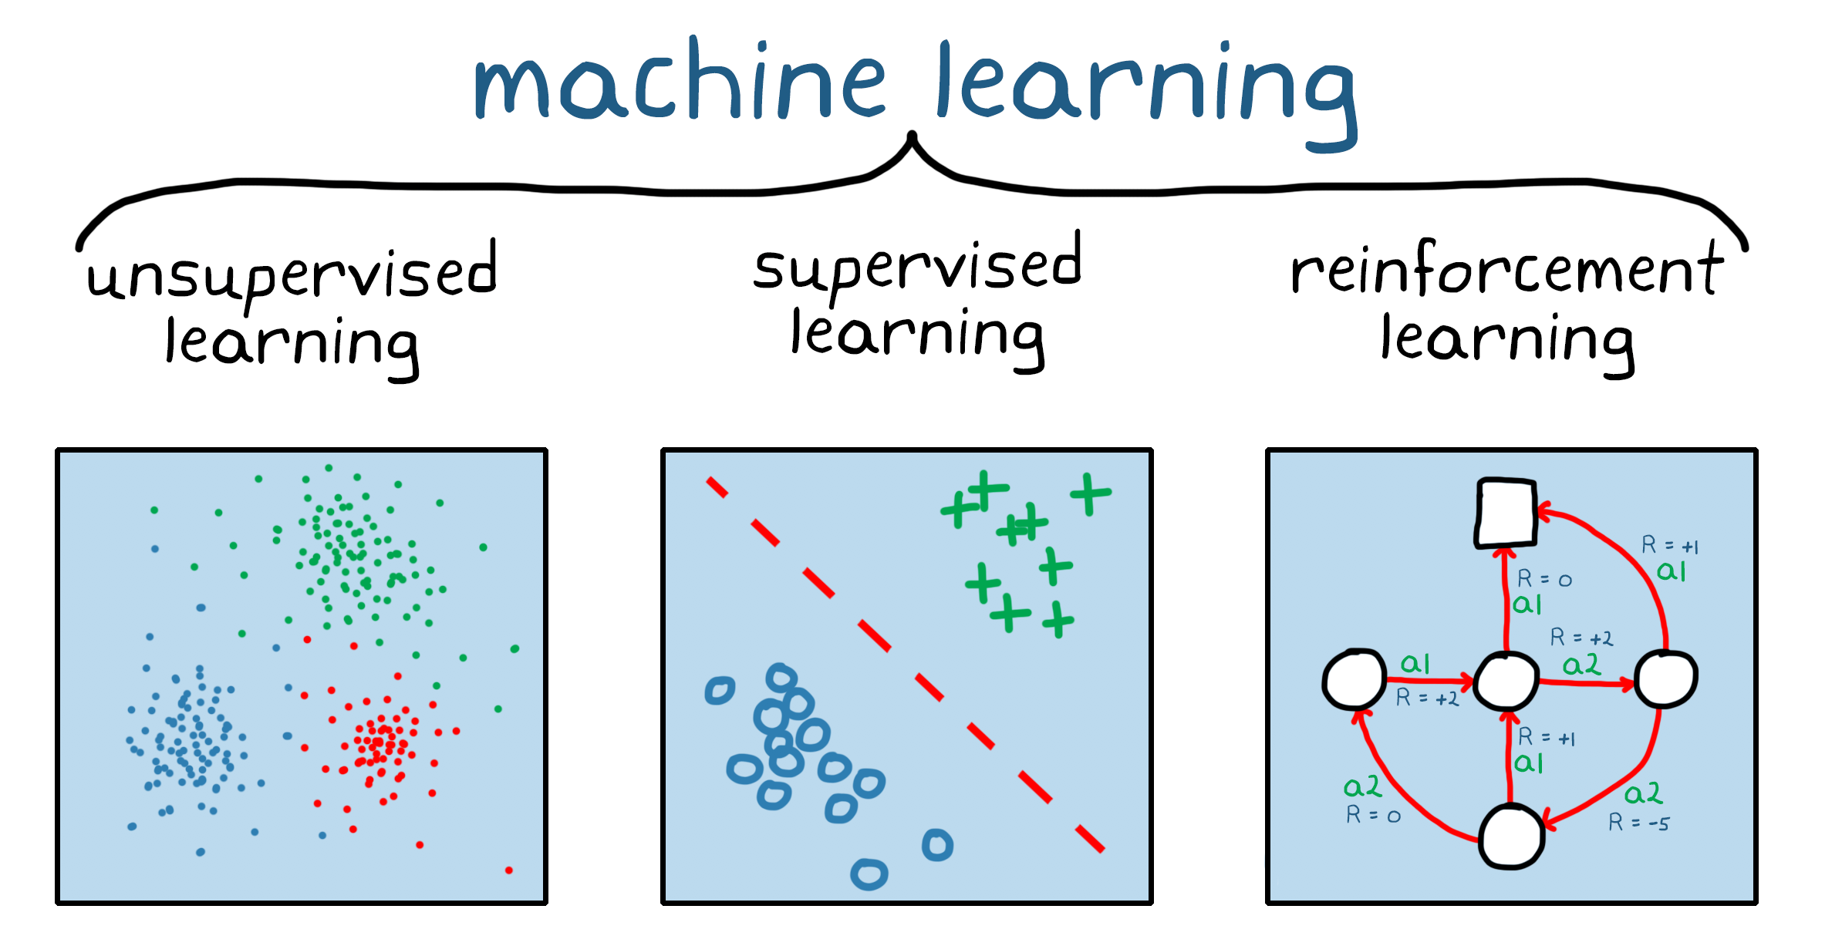

#GUIA ANTIGUA DE PYTORCH

Esta fue la primera guía que hice por lo que es interesante mirarsela y luego seguir con la nueva ya que será mas completa aunque habrá muchos conceptos repetidos con la antigua


##Tensores

In [ ]:
import pandas as pd
import numpy as np

- Tensors son una estructura de datos especializada que es muy **similar a matrices** y arreglos. En PyTorch, usamos tensores para codificar las entradas y salidas de un modelo, así como los parámetros del modelo.

- Los tensores son una estructura de datos fundamental en PyTorch, que es un popular framework de aprendizaje automático de código abierto. **Los tensores se utilizan para representar y manipular datos numéricos, como imágenes, sonido y datos de texto.**

- **Los tensores** en PyTorch son similares a matrices y arreglos en el sentido de que **son matrices multidimensionales de datos numéricos.**

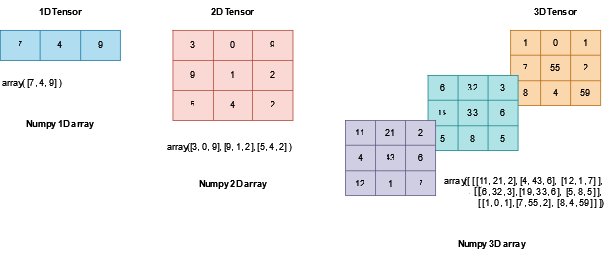

Los tensores son similares a los ndarrays de NumPy, excepto que los tensores pueden** ejecutarse en GPU** u otros aceleradores de hardware. De hecho, los tensores y los ndarrays de NumPy a **menudo pueden compartir la misma dirección de memoria subyacente**, eliminando la necesidad de copiar datos con una capacidad llamada "bridge-to-np-label". Los tensores también **están optimizados para la diferenciación automática** (veremos más sobre eso más adelante en la unidad de Autograd). Si está familiarizado con los ndarrays, se sentirá como en casa con la API de Tensor. Si no, ¡sigamos adelante!

Comencemos configurando nuestro entorno.

In [ ]:
import torch
import numpy as np

###FORMAS DE INICIAR EL TENSOR

####DIRECTAMENTE PASANDOLE LOS DATOS

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

####DESDE UNA ARRAY DE NUMPY

Los tensores se pueden crear a partir de matrices NumPy y viceversa. Dado que la matriz de NumPy 'np_array' y el tensor 'x_np' comparten la misma ubicación de memoria aquí, cambiar el valor de uno cambiará el valor del otro.

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



####DE OTRO TENSOR

El nuevo tensor conserva las propiedades (forma, tipo de datos) del tensor argumento, a menos que se anule explícitamente.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7496, 0.4214],
        [0.4812, 0.3680]]) 



- torch.ones_like(x_data): Esta función crea un nuevo tensor que tiene la misma forma y tipo de datos que el tensor x_data, pero todos los elementos están configurados en 1. Esta función se puede usar para crear un tensor de unos que tenga la misma forma que otro tensor existente. Por ejemplo, si x_data es un tensor de forma (2, 3), entonces x_ones tendrá la forma (2, 3) y todos sus elementos serán 1.

- torch.rand_like(x_data, dtype=torch.float): Esta función crea un nuevo tensor que tiene la misma forma que el tensor x_data, pero todos los elementos se inicializan de forma aleatoria y se establece su tipo de datos en torch.float. Al especificar el argumento dtype=torch.float, estamos anulando el tipo de datos del tensor x_data y especificando explícitamente que el nuevo tensor tendrá un tipo de datos de punto flotante. Esto se puede usar para crear un tensor aleatorio que tenga la misma forma que otro tensor existente. Por ejemplo, si x_data es un tensor de forma (2, 3), entonces x_rand tendrá la forma (2, 3) y sus elementos se inicializarán de forma aleatoria con tipo de datos de punto flotante.

####CON VALORES RANDOM O COSTANTES:

La forma (shape) es una tupla que indica las dimensiones de un tensor. En las funciones siguientes, la forma se utiliza para determinar la dimensionalidad del tensor de salida. La forma muestra el número de filas y columnas en el tensor. Por ejemplo, la forma puede ser escrita como (número de filas, número de columnas).

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1635, 0.3540, 0.7801],
        [0.4801, 0.2776, 0.0389]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


###ATRIBUTOS DE UN TENSOR

Los atributos de los tensores describen su forma (shape), tipo de datos (data type) y el dispositivo (device) en el que se almacenan.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


###Operations on Tensors

Existen más de 100 operaciones de tensor en PyTorch, que incluyen operaciones aritméticas, álgebra lineal, manipulación de matrices (como transposición, indexación, rebanado). Para obtener una descripción detallada, puede consultar la documentación oficial de PyTorch.

Cada una de estas operaciones se puede ejecutar en la GPU, típicamente a velocidades más altas que en una CPU.

- Las CPUs tienen hasta 16 núcleos. Los núcleos son unidades que realizan la computación real. Cada núcleo procesa tareas en orden secuencial (una tarea a la vez).

- Las GPUs tienen miles de núcleos. Los núcleos de la GPU manejan los cálculos en procesamiento paralelo. Las tareas se dividen y procesan en los diferentes núcleos. Eso es lo que hace que las GPUs sean más rápidas que las CPUs en la mayoría de los casos. Las GPUs funcionan mejor con datos grandes que con datos pequeños. Las GPU se utilizan típicamente para la computación intensiva de gráficos o redes neuronales (aprenderemos más sobre eso más adelante en la unidad de Redes Neuronales).

- PyTorch puede utilizar la biblioteca Nvidia CUDA para aprovechar sus tarjetas GPU.

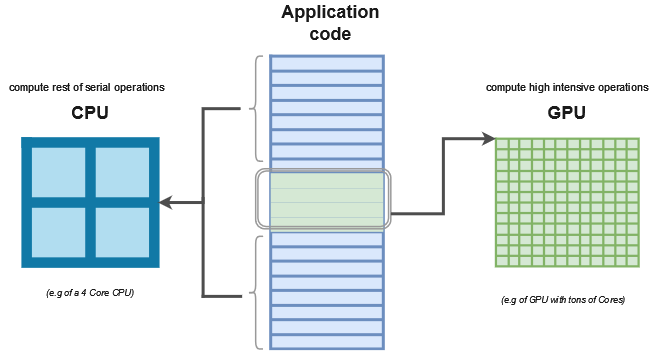

Por defecto, los tensores se crean en la CPU. Los tensores también se pueden computar en las GPU; para hacerlo, es necesario moverlos utilizando el método .to (después de verificar la disponibilidad de la GPU). ¡Tenga en cuenta que copiar tensores grandes entre dispositivos puede ser costoso en términos de tiempo y memoria!

Para mover un tensor a un dispositivo específico (por ejemplo, una GPU), podemos usar el método to. Si el dispositivo de destino no está disponible, el tensor permanecerá en la CPU. Por ejemplo, si x es un tensor en la CPU, podemos moverlo a una GPU disponible de la siguiente manera:

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

Prueba algunas de las operaciones de la lista. Si estás familiarizado con la API de NumPy, encontrarás que la API de Tensor es muy fácil de usar.

####Standard numpy-like indexing and slicing:

In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


####Unir tensores

Puedes utilizar torch.cat para concatenar una secuencia de tensores a lo largo de una dimensión dada. torch.stack es otra opción para unir tensores que es sutilmente diferente de torch.cat

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


####OPERACIONES ARITMÉTICAS

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

- tensor @ tensor.T: realiza la multiplicación de matrices entre el tensor y su transposición. La notación @ es equivalente al método matmul en PyTorch. Los tensores y1 y y2 tendrán el mismo valor.

- torch.rand_like(tensor): crea un tensor aleatorio con la misma forma y tipo de datos que tensor.

- torch.matmul(tensor, tensor.T, out=y3): realiza la multiplicación de matrices entre tensor y su transposición, y almacena el resultado en y3. Este método también se puede utilizar para especificar el tensor de salida de la operación. Los tensores y2 y y3 tendrán el mismo valor.

- tensor * tensor: realiza el producto elemento a elemento entre el tensor y sí mismo. La notación * es equivalente al método mul en PyTorch. Los tensores z1 y z2 tendrán el mismo valor.

- torch.mul(tensor, tensor, out=z3): realiza el producto elemento a elemento entre el tensor y sí mismo, y almacena el resultado en z3. Este método también se puede utilizar para especificar el tensor de salida de la operación. Los tensores z2 y z3 tendrán el mismo valor.

####TENSOR DE ELEMENTO UNICO

Si tienes un tensor con un solo elemento, por ejemplo, si has agregado todos los valores de un tensor en un solo valor, puedes convertirlo a un valor numérico de Python utilizando el método item().

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


####Las operaciones in-place (en su lugar)

Las operaciones que almacenan el resultado directamente en el operando se denominan operaciones in-place (en su lugar). Estas operaciones se indican con un guión bajo _ al final del nombre del método. Por ejemplo, x.copy_(y) y x.t_() son operaciones in-place que cambiarán el tensor x directamente.



Nota: las operaciones in-place ahorran algo de memoria, pero pueden ser problemáticas al calcular derivadas debido a una pérdida inmediata del historial (historial de autograd). Por lo tanto, se desaconseja su uso.

In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


####Puente con NumPy

Los tensores en la CPU y los arrays de NumPy pueden compartir sus ubicaciones de memoria subyacentes, y cambiar uno cambiará al otro.

####Tensor A NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Un cambio en el tensor se refleja en el array de NumPy.

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


####NumPy array to Tensor

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Los cambios en el array de NumPy se reflejan en el tensor.

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


##Carga y normalización de conjuntos de datos

#### datasets y cargadores de datos

El código para procesar muestras de datos puede ser confuso y difícil de mantener; idealmente, queremos que nuestro código de conjunto de datos esté desacoplado de nuestro código de entrenamiento de modelo para una mejor legibilidad y modularidad. PyTorch proporciona dos primitivas de datos: torch.utils.data.DataLoader y torch.utils.data.Dataset que le permiten usar conjuntos de datos pre-cargados y sus propios datos. El conjunto de datos almacena las muestras y sus etiquetas correspondientes, y el DataLoader envuelve un iterador alrededor del conjunto de datos para permitir un acceso fácil a las muestras.

Las bibliotecas de dominio de PyTorch proporcionan varios conjuntos de datos pre-cargados de muestra (como FashionMNIST) que heredan de torch.utils.data.Dataset e implementan funciones específicas para los datos particulares. Se pueden encontrar y utilizar como muestras para prototipar y evaluar su modelo aquí:

- Conjuntos de datos de imagen
- Conjuntos de datos de texto
- Conjuntos de datos de audio

####CARGAR UN DATASET

Cargaremos el conjunto de datos Fashion-MNIST de TorchVision. Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de 60,000 ejemplos de entrenamiento y 10,000 ejemplos de prueba. Cada ejemplo consta de una imagen en escala de grises de 28x28 píxeles y una etiqueta asociada de una de las 10 clases.

Cada imagen tiene 28 píxeles de altura y 28 píxeles de ancho, con un total de 784 píxeles. Las 10 clases indican qué tipo de imagen es. Por ejemplo: camiseta/top, pantalón, suéter, vestido, bolso, bota, etc.

Los valores de escala de grises son valores entre 0 y 255 que miden la intensidad de las imágenes en blanco y negro. El valor de intensidad aumenta de blanco a negro. Por ejemplo: un color blanco será 0, mientras que un color negro será 255.

Cargamos el conjunto de datos FashionMNIST con los siguientes parámetros:

- "root" es la ruta donde se almacenan los datos de entrenamiento/prueba,
- "train" especifica el conjunto de datos de entrenamiento o prueba,
- "download=True" descarga los datos de Internet si no están disponibles en "root".
- "transform" y "target_transform" especifican las transformaciones de características y etiquetas.

In [ ]:

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



###ITERACIÓN Y VISUALIZACIÓN DEL DATASET

Podemos indexar manualmente los conjuntos de datos como una lista: training_data[index]. Utilizamos matplotlib para visualizar algunas muestras en nuestros datos de entrenamiento.

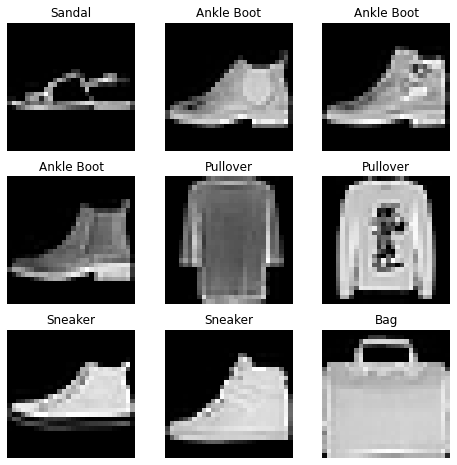

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

###PREPARACIÓN DE LOS DATOS PARA EL ENTRENAMIENTO CON DATALOADERS

El Dataset recupera las características y etiquetas de nuestro conjunto de datos una muestra a la vez. Mientras se entrena un modelo, generalmente queremos pasar las muestras en "minibatches", reorganizar los datos en cada época para reducir el sobreajuste del modelo y utilizar la multiprocesamiento de Python para acelerar la recuperación de datos.

En el aprendizaje automático, es necesario especificar cuáles son las características y las etiquetas en su conjunto de datos. Las características son la entrada y las etiquetas son la salida. Entrenamos utilizando las características y el modelo para predecir la etiqueta.

- Las etiquetas son los 10 tipos de clases: Camiseta, Sandalia, Vestido, etc.
- Las características son los patrones en los píxeles de las imágenes.

El DataLoader es un iterable que abstrae esta complejidad para nosotros en una API fácil. Para usar el Dataloader, debemos establecer los siguientes parámetros:

- datos los datos de entrenamiento que se utilizarán para entrenar el modelo; y los datos de prueba para evaluar el modelo.
- tamaño de lote el número de registros que se procesarán en cada lote.
- mezcla la muestra aleatoria de los datos por índices.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

###Iterar a través del DataLoader.

Hemos cargado ese conjunto de datos en el DataLoader y podemos iterar a través del conjunto de datos según sea necesario. Cada iteración a continuación devuelve un lote de train_features y train_labels (que contienen 64 características y etiquetas respectivamente). Debido a que especificamos shuffle=True, después de iterar sobre todos los lotes, los datos se barajan (para un control más fino sobre el orden de carga de los datos).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


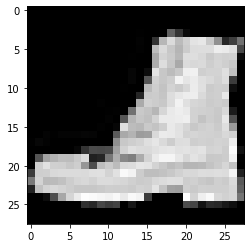

Label: 9


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

###NORMALIZACIÓN

La normalización es una técnica común de preprocesamiento de datos que se aplica para escalar o transformar los datos y asegurarse de que haya una contribución de aprendizaje igual de cada característica. Por ejemplo, cada píxel en las imágenes en escala de grises tiene un valor entre 0 y 255, que son características. Si un valor de píxel es 17 y otro es 197, habrá una distribución desigual de la importancia del píxel, ya que los volúmenes de píxeles más altos desviarán el aprendizaje. La normalización cambia el rango de sus datos sin distorsionar su distinción entre nuestras características. Este preprocesamiento es para evitar:

- Una reducción de la precisión de la predicción.
- Dificultad para que el modelo aprenda.
- Distribución desfavorable de los rangos de datos de las características.

###TRANSFORMACIONES

Los datos no siempre vienen en su forma procesada final que se requiere para entrenar algoritmos de aprendizaje automático. Utilizamos transformaciones para realizar algunas manipulaciones de los datos y hacerlos adecuados para el entrenamiento.

Todos los conjuntos de datos de TorchVision tienen dos parámetros (transform para modificar las características y target_transform para modificar las etiquetas) que aceptan llamables que contienen la lógica de transformación. El módulo torchvision.transforms ofrece varias transformaciones comúnmente utilizadas listas para su uso.

Las características de FashionMNIST están en formato de imagen PIL y las etiquetas son enteros. Para el entrenamiento, necesitamos las características como tensores normalizados y las etiquetas como tensores codificados en uno. Para realizar estas transformaciones, utilizamos ToTensor y Lambda.

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

###A TENSOR

ToTensor convierte una imagen PIL o un ndarray de NumPy en un FloatTensor y escala los valores de intensidad de píxel de la imagen en el rango [0., 1.].

###TRANSFORMACIONES LAMDA

Las transformaciones Lambda aplican cualquier función lambda definida por el usuario. Aquí, definimos una función para convertir el número entero en un tensor codificado en uno. Primero crea un tensor de ceros de tamaño 10 (el número de etiquetas en nuestro conjunto de datos) y llama a scatter, que asigna un valor=1 en el índice dado por la etiqueta y. También puede usar torch.nn.functional.one_hot como otra opción para hacer eso

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

##costruyendo las capas del modelo

###QUÉ ES UNA RED NEURONAL

La red neuronal es una colección de neuronas conectadas por capas. Cada neurona es una pequeña unidad de computación que realiza cálculos simples para resolver un problema de manera colectiva. Están organizados en capas. Hay 3 tipos de capas: capa de entrada, capa oculta y capa de salida. Cada capa contiene un número de neuronas, excepto la capa de entrada. Las redes neuronales imitan la forma en que el cerebro humano procesa la información.

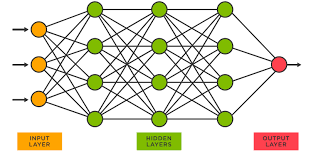

###COMPONENTES DE UNA RED NEURONAL

La red neuronal es una colección de neuronas conectadas por capas. Cada neurona es una pequeña unidad de computación que realiza cálculos simples para resolver un problema de manera colectiva. Están organizados en capas. Hay 3 tipos de capas: capa de entrada, capa oculta y capa de salida. Cada capa contiene un número de neuronas, excepto la capa de entrada. Las redes neuronales imitan la forma en que el cerebro humano procesa la información.

La función de activación determina si una neurona debe activarse o no. Los cálculos que ocurren en una red neuronal incluyen la aplicación de una función de activación. Si una neurona se activa, significa que la entrada es importante. Existen diferentes tipos de funciones de activación. La elección de qué función de activación utilizar depende de lo que se desea que sea la salida. Otro papel importante de una función de activación es agregar no linealidad al modelo.

Aquí están algunos ejemplos de funciones de activación comunes:

- Binary:

In [ ]:
f(x) = {
    0, if x < 0
    1, if x >= 0
}


SyntaxError: ignored

Se utiliza para establecer un nodo de salida en 1 si el resultado de la función es positivo y 0 si el resultado de la función es negativo.

- Sigmoide:

In [ ]:
f(x) = 1 / (1 + e^(-x))


Se utiliza para predecir la probabilidad de que un nodo de salida esté entre 0 y 1.

- Tanh:

In [ ]:
f(x) = (e^x - e^(-x)) / (e^x + e^(-x))


Se utiliza para predecir si un nodo de salida está entre 1 y -1. Se utiliza en casos de uso de clasificación.

- ReLU:

In [ ]:
f(x) = {
    0, if x < 0
    x, if x >= 0
}


Se utiliza para establecer el nodo de salida en 0 si el resultado de la función es negativo y mantener el valor del resultado si el resultado es un valor positivo.

Los pesos influyen en qué tan cerca estará la salida de nuestra red del valor de salida esperado. Cuando una entrada entra en la neurona, se multiplica por un valor de peso y la salida resultante se observa o se pasa a la siguiente capa en la red neuronal. Los pesos para todas las neuronas en una capa se organizan en un tensor.

El sesgo compensa la diferencia entre la salida de la función de activación y su salida prevista. Un sesgo bajo sugiere que la red está haciendo más suposiciones sobre la forma de la salida, mientras que un valor de sesgo alto hace menos suposiciones sobre la forma de la salida.

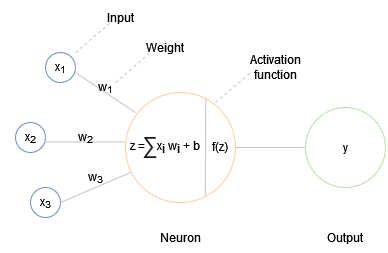

La salida y de una capa de una red neuronal con pesos W y sesgo b se calcula como la suma de las entradas multiplicadas por los pesos más el sesgo, donde f(x) es la función de activación.

###CONSTRUCCIÓN DE RED NEURONAL

Las redes neuronales están compuestas por capas/módulos que realizan operaciones en los datos. El espacio de nombres torch.nn proporciona todos los bloques de construcción necesarios para construir su propia red neuronal. Cada módulo en PyTorch es una subclase de nn.Module. Una red neuronal es en sí misma un módulo que consta de otros módulos (capas). Esta estructura anidada permite construir y administrar fácilmente arquitecturas complejas.

En las siguientes secciones, construiremos una red neuronal para clasificar imágenes en el conjunto de datos FashionMNIST.

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

###comprobación si cuda está disponible

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


###define la clase

Definimos nuestra red neuronal mediante la subclase nn.Module e inicializamos las capas de la red neuronal en init. Cada subclase de nn.Module implementa las operaciones en los datos de entrada en el método forward.

Nuestra red neuronal se compone de lo siguiente:

- La capa de entrada con 28x28 o 784 características/píxeles.
- El primer módulo lineal toma las 784 características de entrada y las transforma en una capa oculta con 512 características.
- La función de activación ReLU se aplicará en la transformación.
- El segundo módulo lineal toma como entrada las 512 características de la primera capa oculta y las transforma en la siguiente capa oculta con 512 características.
- La función de activación ReLU se aplicará en la transformación.
- El tercer módulo lineal toma como entrada las 512 características de la segunda capa oculta y las transforma en la capa de salida con 10 características, que es el número de clases.
- La función de activación ReLU se aplicará en la transformación.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Imagina que la clase NeuralNetwork es como un robot que aprende a hacer tareas. El __init__ es como la mente del robot, donde se prepara para hacer la tarea. En el __init__, se crea una lista de cosas que el robot necesita hacer para completar la tarea, como cortar un objeto en pedazos o pegar dos cosas juntas.

Por otro lado, la línea super(NeuralNetwork, self).__init__() es como el botón de encendido del robot. Cuando se presiona el botón, se enciende el robot y comienza a hacer su tarea. En este caso, la línea super prepara al robot para hacer la tarea, dándole las herramientas necesarias para hacer su trabajo.

Espero que esta explicación ayude a entender la función del __init__ y el super en la definición de la clase NeuralNetwork.

Creamos una instancia de NeuralNetwork, la movemos al dispositivo correspondiente y mostramos su estructura mediante impresión en pantalla.

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Para utilizar el modelo, le pasamos los datos de entrada. Esto ejecuta el método forward del modelo, junto con algunas operaciones de fondo. Sin embargo, ¡no llamamos directamente al método model.forward()! Llamar al modelo con los datos de entrada devuelve un tensor de 10 dimensiones con valores predichos para cada clase.

Obtenemos las probabilidades de predicción al pasar el tensor por una instancia de nn.Softmax.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='cuda:0')


**texto en negrita**##Los pesos (weights) y los sesgos (biases)

El módulo nn.Linear inicializa de manera aleatoria los pesos (weights) y los sesgos (biases) para cada capa y almacena internamente los valores en tensores (Tensors).

In [ ]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")

print(f"First Linear weights: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[-0.0107, -0.0124,  0.0282,  ...,  0.0313,  0.0146,  0.0266],
        [ 0.0119,  0.0156,  0.0002,  ...,  0.0062, -0.0028,  0.0005],
        [ 0.0208, -0.0218, -0.0281,  ..., -0.0150, -0.0223,  0.0075],
        ...,
        [ 0.0120,  0.0207,  0.0076,  ...,  0.0323,  0.0082, -0.0003],
        [ 0.0321, -0.0022, -0.0180,  ...,  0.0193, -0.0207,  0.0253],
        [ 0.0312, -0.0094, -0.0272,  ...,  0.0057,  0.0269, -0.0263]],
       device='cuda:0', requires_grad=True) 

First Linear weights: Parameter containing:
tensor([ 0.0290,  0.0073,  0.0198, -0.0180,  0.0176,  0.0309, -0.0177, -0.0040,
        -0.0313,  0.0042,  0.0262,  0.0291, -0.0246,  0.0349, -0.0200,  0.0203,
        -0.0227, -0.0221, -0.0125, -0.0192, -0.0019, -0.0088,  0.0266, -0.0059,
         0.0245,  0.0121,  0.0324,  0.0004, -0.0129,  0.0140,  0.0035,  0.0239,
        -0.0037,  0.0027, -0.0216,  0.0089,  0.0031,  0.0049, -0.0210, -0.0236,
         0.0290,  0.0144,  0.006


##Las capas del modelo

Vamos a desglosar las capas en el modelo FashionMNIST. Para ilustrarlo, tomaremos un minibatch de muestra de 3 imágenes de tamaño 28x28 y veremos qué sucede cuando lo pasamos por la red neuronal.

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


##nn.Flatten

Inicializamos la capa nn.Flatten para convertir cada imagen 2D de 28x28 en un arreglo contiguo de 784 valores de píxeles (se mantiene la dimensión del minibatch en dim=0). Cada uno de los píxeles se pasa a la capa de entrada de la red neuronal.

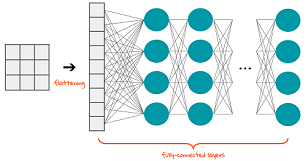

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


##nn.Linear

La capa lineal es un módulo que aplica una transformación lineal en la entrada usando sus pesos y sesgos almacenados. El valor de escala de cada píxel en la capa de entrada se conectará a los neuronas en la capa oculta para el cálculo. El cálculo utilizado para la transformación es
peso * entrada + sesgo.

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


##NN.RELU

Las activaciones no lineales son las que crean los mapeos complejos entre las entradas y salidas del modelo. Se aplican después de las transformaciones lineales para introducir no linealidad, lo que ayuda a las redes neuronales a aprender una amplia variedad de fenómenos. En este modelo, usamos la función de activación ReLU (nn.ReLU) entre nuestras capas lineales, pero hay otras activaciones que se pueden utilizar para introducir no linealidad en el modelo.

La función de activación ReLU toma la salida de la capa lineal y reemplaza los valores negativos por ceros.

Salida lineal:
x = peso * entrada + sesgo.

ReLU:
f(x) =
{
0, si x < 0,
x, si x ≥ 0
}

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2802, -0.5069,  0.3016,  0.3024, -0.4682, -0.3654, -0.0318, -0.1717,
          0.2884,  0.5594,  0.2044, -0.3803, -0.5665, -0.0987, -0.2963,  0.2918,
          0.2251,  0.4414, -0.0953, -0.0947],
        [ 0.3032, -0.3630,  0.5571,  0.2690, -0.1483, -0.2218,  0.4017, -0.3736,
          0.2167,  0.4305,  0.0115, -0.3900,  0.0541,  0.2668,  0.0824,  0.3247,
          0.2309,  0.0107,  0.1799, -0.0354],
        [ 0.2194, -0.2892,  0.0062, -0.1199, -0.5790, -0.2683, -0.0068, -0.3406,
          0.3585,  0.2266,  0.1510, -0.1246, -0.7147,  0.3384, -0.0146,  0.3011,
          0.1441,  0.3330, -0.1327, -0.0918]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2802, 0.0000, 0.3016, 0.3024, 0.0000, 0.0000, 0.0000, 0.0000, 0.2884,
         0.5594, 0.2044, 0.0000, 0.0000, 0.0000, 0.0000, 0.2918, 0.2251, 0.4414,
         0.0000, 0.0000],
        [0.3032, 0.0000, 0.5571, 0.2690, 0.0000, 0.0000, 0.4017, 0.0000, 0.2167,
         0.4305, 0.0115, 0.0000, 0.0541, 0.2668, 0.08

## N.SEQUENTIAL

**nn.Sequential** es un contenedor ordenado de módulos en PyTorch. Los datos se pasan a través de todos los módulos en el mismo orden en que están definidos. Se pueden utilizar contenedores secuenciales para construir rápidamente una red neuronal, como en el caso de **seq_modules.**

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

##nn.Softmax

La última capa lineal de la red neuronal devuelve logits, que son valores brutos en el rango [-infinito, infinito], y que se pasan al módulo nn.Softmax. La función de activación Softmax se utiliza para calcular la probabilidad de la salida de la red neuronal. Se utiliza únicamente en la capa de salida de una red neuronal. Los resultados se escalan a valores en el rango [0, 1], que representan las densidades predichas por el modelo para cada clase. El parámetro dim indica la dimensión a lo largo de la cual los valores de resultado deben sumarse a 1. El nodo con la probabilidad más alta predice la salida deseada.

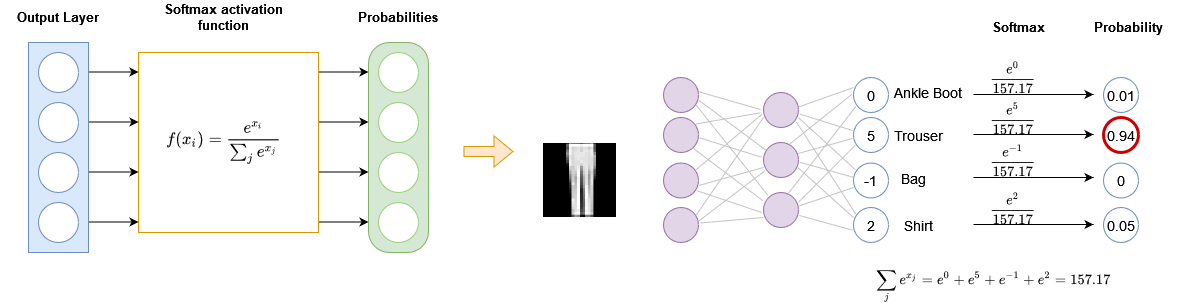

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

##Model parameters

Muchas capas dentro de una red neuronal están parametrizadas, es decir, tienen pesos y sesgos asociados que se optimizan durante el entrenamiento. La subclase nn.Module realiza automáticamente el seguimiento de todos los campos definidos dentro del objeto de su modelo y hace que todos los parámetros sean accesibles mediante los métodos parameters() o named_parameters() de su modelo.

En este ejemplo, iteramos sobre cada parámetro e imprimimos su tamaño y una vista previa de sus valores.

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0107, -0.0124,  0.0282,  ...,  0.0313,  0.0146,  0.0266],
        [ 0.0119,  0.0156,  0.0002,  ...,  0.0062, -0.0028,  0.0005]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0290, 0.0073], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0181, -0.0073, -0.0304,  ...,  0.0137,  0.0005, -0.0110],
        [ 0.0145,  0.0032, -0.0021,  ..., -0.0351,  0.0074,  0.0066]],
       device='cuda

##DIFERENCIACIÓN AUTOMÁTICA

##Diferenciación automática con torch.autograd.

Cuando se entrenan redes neuronales, el algoritmo más utilizado es la retropropagación. En este algoritmo, los parámetros (pesos del modelo) se ajustan según el gradiente de la función de pérdida con respecto al parámetro dado. La función de pérdida calcula la diferencia entre la salida esperada y la salida real que produce una red neuronal. El objetivo es obtener el resultado de la función de pérdida lo más cercano posible a cero. El algoritmo recorre hacia atrás la red para ajustar los pesos y el sesgo para volver a entrenar el modelo. Por eso se llama retropropagación. Este proceso de reentrenamiento del modelo a lo largo del tiempo para reducir la pérdida a 0 se llama descenso de gradiente.

Para calcular esos gradientes, PyTorch tiene un motor de diferenciación incorporado llamado torch.autograd. Admite el cálculo automático del gradiente para cualquier gráfico computacional.

Considere la red neuronal más simple de una capa, con entrada x, parámetros w y b, y alguna función de pérdida. Puede definirse en PyTorch de la siguiente manera:

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

Primero, se importa la librería PyTorch con la línea de código import torch.

Luego, se crea un tensor de entrada de tamaño 5 con todos los elementos iguales a 1 usando la función torch.ones(5). Este tensor se asigna a la variable x.

A continuación, se crea un tensor de salida esperada de tamaño 3 con todos los elementos iguales a 0 usando la función torch.zeros(3). Este tensor se asigna a la variable y.

Se define un tensor de pesos de tamaño (5, 3) con valores aleatorios utilizando la función torch.randn(5, 3, requires_grad=True). El parámetro requires_grad=True indica que se deben rastrear los gradientes de este tensor durante la retropropagación.

También se define un tensor de sesgos de tamaño (3) con valores aleatorios utilizando la función torch.randn(3, requires_grad=True). El parámetro requires_grad=True indica que se deben rastrear los gradientes de este tensor durante la retropropagación.

Luego, se calcula la salida de la red neuronal aplicando la multiplicación matricial del tensor de entrada x y el tensor de pesos w y sumando el tensor de sesgos b. Esto se hace usando la función torch.matmul(x, w)+b y se asigna el resultado a la variable z.

A continuación, se calcula la función de pérdida utilizando la función torch.nn.functional.binary_cross_entropy_with_logits(z, y). Esta función calcula la pérdida de entropía cruzada binaria entre la salida z y la salida esperada y. La función binary_cross_entropy_with_logits se utiliza comúnmente en problemas de clasificación binaria. El resultado se asigna a la variable loss.

##Tensors, Functions and Computational graph

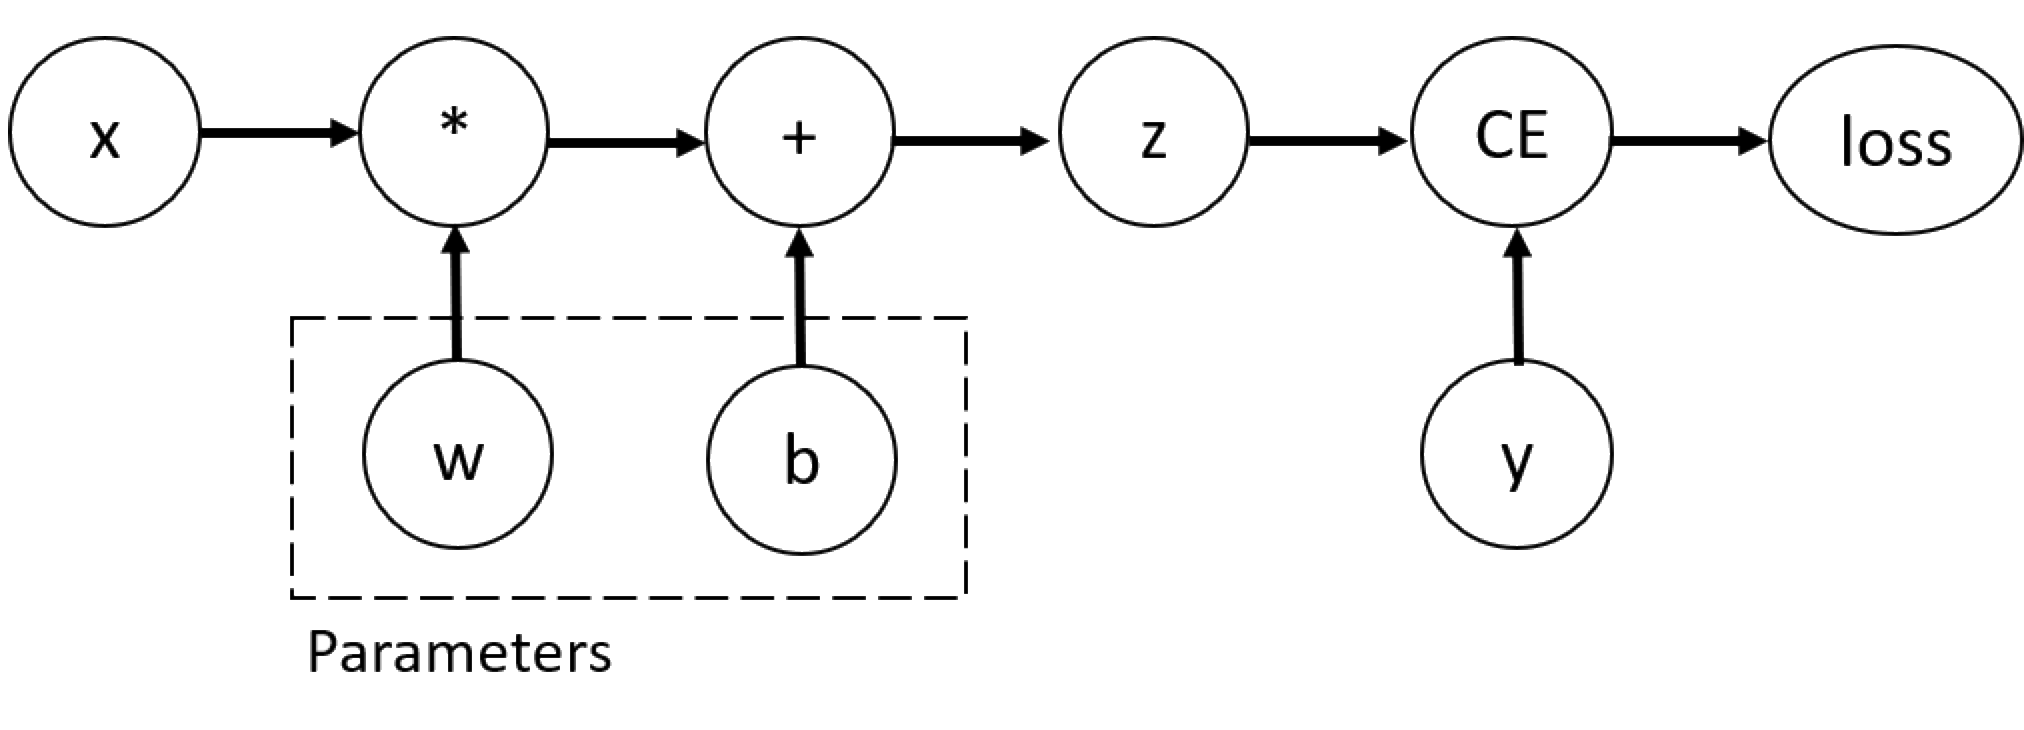

En esta red, w y b son parámetros que necesitamos optimizar. Por lo tanto, necesitamos poder calcular los gradientes de la función de pérdida con respecto a esas variables. Para hacer eso, establecemos la propiedad requires_grad de esos tensores.

Nota: Puede establecer el valor de requires_grad al crear un tensor, o más tarde usando el método x.requires_grad_(True).

Una función que aplicamos a tensores para construir un grafo computacional es en realidad un objeto de la clase Function. Este objeto sabe cómo calcular la función en la dirección hacia adelante, y también sabe cómo calcular su derivada durante el paso de retropropagación. Una referencia a la función de retropropagación se almacena en la propiedad grad_fn de un tensor.

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f2015835190>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f2015835790>


##Calcular gradientes

Para optimizar los pesos de los parámetros en la red neuronal, necesitamos calcular las derivadas de nuestra función de pérdida con respecto a los parámetros, es decir, necesitamos ∂loss/∂w y ∂loss/∂b bajo algunos valores fijos de x e y. Para calcular esas derivadas, llamamos a loss.backward() y luego recuperamos los valores de w.grad y b.grad:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0181, 0.2798, 0.2993],
        [0.0181, 0.2798, 0.2993],
        [0.0181, 0.2798, 0.2993],
        [0.0181, 0.2798, 0.2993],
        [0.0181, 0.2798, 0.2993]])
tensor([0.0181, 0.2798, 0.2993])


Nota: solo podemos obtener las propiedades de gradiente para los nodos hoja del grafo computacional, que tienen la propiedad requires_grad establecida en True. Para todos los demás nodos en nuestro grafo, los gradientes no estarán disponibles. Además, solo podemos realizar cálculos de gradiente utilizando backward una vez en un grafo dado, por razones de rendimiento. Si necesitamos realizar varias llamadas backward en el mismo grafo, necesitamos pasar retain_graph=True a la llamada backward.

##Desactivando el seguimiento de gradientes

De forma predeterminada, todos los tensores con requires_grad=True están registrando su historial computacional y soportan el cálculo de gradientes. Sin embargo, hay casos en los que no necesitamos hacer esto, por ejemplo, cuando hemos entrenado el modelo y solo queremos aplicarlo a algunos datos de entrada, es decir, solo queremos hacer cálculos hacia adelante a través de la red. Podemos detener el seguimiento de cálculos rodeando nuestro código de computación con un bloque torch.no_grad():

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Otra forma de lograr el mismo resultado es usar el método detach() en el tensor:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


Existen razones por las que puede querer desactivar el seguimiento de gradientes:

Para marcar algunos parámetros en su red neuronal como parámetros congelados. Este es un escenario muy común para ajustar finamente una red pre-entrenada.
Para acelerar los cálculos cuando solo está realizando un pase hacia adelante, porque los cálculos en tensores que no rastrean gradientes serían más eficientes.

##Más sobre los grafos computacionales

Conceptualmente, autograd mantiene un registro de los datos (tensores) y todas las operaciones ejecutadas (junto con los nuevos tensores resultantes) en un grafo dirigido acíclico (DAG) que consiste en objetos de función. En este DAG, las hojas son los tensores de entrada y las raíces son los tensores de salida. Al rastrear este grafo de raíces a hojas, puede calcular automáticamente los gradientes utilizando la regla de la cadena.

En un pase hacia adelante, autograd realiza dos cosas simultáneamente:

- Ejecuta la operación solicitada para calcular un tensor resultante.
- Mantiene la función de gradiente de la operación en el DAG.

El pase hacia atrás comienza cuando se llama a .backward() en la raíz del DAG. Luego, autograd:

- Calcula los gradientes de cada .grad_fn.
- Los acumula en el atributo .grad del tensor correspondiente.
- Utilizando la regla de la cadena, se propagan hasta los tensores hoja.

Los DAG son dinámicos en PyTorch.

Una cosa importante a tener en cuenta es que el grafo se recrea desde cero; después de cada llamada a .backward(), autograd comienza a poblar un nuevo grafo. Esto es exactamente lo que le permite usar declaraciones de flujo de control en su modelo; puede cambiar la forma, el tamaño y las operaciones en cada iteración si es necesario.

##Lectura opcional: gradientes de tensor y productos de Jacobiano

En muchos casos, tenemos una función de pérdida escalar y necesitamos calcular el gradiente con respecto a algunos parámetros. Sin embargo, hay casos en los que la función de salida es un tensor arbitrario. En este caso, PyTorch le permite calcular el llamado producto de Jacobiano, y no el gradiente real.

Para una función vectorial →y=f(→x), donde →x=⟨x1,…,xn⟩ y →y=⟨y1,…,ym⟩, un gradiente de →y con respecto a →x está dado por la matriz jacobiana, cuyo elemento Jij contiene ∂yi/∂xj.

En lugar de calcular la matriz jacobiana en sí, PyTorch le permite calcular el producto de Jacobiano vT⋅J para un vector de entrada dado v=(v1…vm). Esto se logra llamando a backward con v como argumento. El tamaño de v debe ser el mismo que el tamaño del tensor original, con respecto al cual queremos calcular el producto:

In [ ]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


Este código crea un tensor cuadrado de identidad de tamaño 5x5 llamado inp con la propiedad requires_grad establecida en True. Luego, calcula un nuevo tensor llamado out, que es el resultado de sumar 1 a cada elemento de inp y elevarlo al cuadrado.

A continuación, se llama a backward en out con un tensor de igual forma que inp que contiene solo unos. Esto calcula los gradientes de out con respecto a inp y los almacena en el atributo grad de inp.

Luego se imprimen los gradientes de inp después de la primera llamada a backward. Debido a que retain_graph está establecido en True, el grafo computacional se mantiene intacto para que se puedan realizar más llamadas a backward en el mismo grafo.

Se realiza otra llamada a backward con los mismos argumentos y se imprimen los gradientes de inp nuevamente. Como era de esperar, los gradientes son iguales en ambas llamadas, ya que se usó el mismo grafo.

A continuación, se establecen los gradientes de inp en cero con inp.grad.zero_(). Esto es útil si se desea realizar múltiples llamadas a backward en el mismo grafo pero se desea comenzar con los gradientes en cero en cada llamada.

Finalmente, se realiza otra llamada a backward con los mismos argumentos que antes y se imprimen los gradientes de inp. Debido a que se establecieron en cero antes de la última llamada, los gradientes de inp son diferentes y ahora son cero.

Observa que cuando llamamos a backward por segunda vez con el mismo argumento, el valor del gradiente es diferente. Esto sucede porque al realizar la propagación hacia atrás, PyTorch acumula los gradientes, es decir, el valor de los gradientes calculados se suma a la propiedad grad de todos los nodos hoja del grafo computacional. Si desea calcular los gradientes adecuados, debe restablecer la propiedad grad en cero antes. En el entrenamiento en la vida real, un optimizador nos ayuda a hacer esto.

Nota: anteriormente estábamos llamando a la función backward() sin parámetros. Esto es equivalente a llamar a backward(torch.tensor(1.0)), que es una forma útil de calcular los gradientes en caso de una función de valor escalar, como la función de pérdida durante el entrenamiento de redes neuronales.

##bucle de optimización

##OPTIMIZACION DE PARAMETROS EN MODELOS

Ahora que tenemos un modelo y datos, es hora de entrenar, validar y probar nuestro modelo mediante la optimización de sus parámetros en nuestros datos. Entrenar un modelo es un proceso iterativo; en cada iteración (llamada época), el modelo hace una suposición sobre la salida, calcula el error en su suposición (pérdida), recopila las derivadas del error con respecto a sus parámetros (como vimos en el módulo anterior) y optimiza estos parámetros utilizando el descenso del gradiente.

##CODIGO DE PREREQUISITOS

Cargaremos el código de los módulos anteriores sobre Conjuntos de datos y Cargadores de datos y Construcción de modelos.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



##configuración de hyperparametros

Los hiperparámetros son parámetros ajustables que te permiten controlar el proceso de optimización del modelo. Diferentes valores de hiperparámetros pueden afectar el entrenamiento del modelo y el nivel de precisión.

Definimos los siguientes hiperparámetros para el entrenamiento:

- Número de épocas: el número de veces que se pasa todo el conjunto de datos de entrenamiento a través de la red neuronal.

- Tamaño de lote (Batch Size): la cantidad de muestras de datos vistas por el modelo en cada época. Las iteraciones son el número de lotes necesarios para completar una época.

- Tasa de aprendizaje (Learning Rate): el tamaño de los pasos que el modelo toma a medida que busca los mejores pesos que producirán una mayor precisión del modelo. Los valores más pequeños significan que el modelo tardará más tiempo en encontrar los mejores pesos, mientras que los valores más grandes pueden hacer que el modelo se salte los mejores pesos, lo que resulta en un comportamiento impredecible durante el entrenamiento.

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

##loop de optimización

Una vez que establecemos nuestros hiperparámetros, podemos entrenar y optimizar nuestro modelo con un ciclo de optimización. Cada iteración del ciclo de optimización se llama época.

Cada época consta de dos partes principales:

- El bucle de entrenamiento (Train Loop) - iterar sobre el conjunto de datos de entrenamiento y tratar de converger a los parámetros óptimos.

- El bucle de validación/prueba (Validation/Test Loop) - iterar sobre el conjunto de datos de prueba para verificar si el rendimiento del modelo está mejorando.

Veamos brevemente algunos de los conceptos utilizados en el bucle de entrenamiento. Continúa para ver la implementación completa del ciclo de optimización.

Agregar una función de pérdida
Cuando se presenta un conjunto de datos de entrenamiento, es probable que nuestra red no capacitada dé la respuesta correcta. La función de pérdida mide el grado de disimilitud del resultado obtenido con el valor objetivo, y es la función de pérdida que queremos minimizar durante el entrenamiento. Para calcular la pérdida, hacemos una predicción utilizando las entradas de nuestra muestra de datos dada y la comparamos con el valor de la etiqueta de datos verdaderos.

Las funciones de pérdida comunes incluyen:

- nn.MSELoss (Error Cuadrático Medio) utilizado para tareas de regresión.

- nn.NLLLoss (Logaritmo Negativo de Verosimilitud) utilizado para clasificación.

- nn.CrossEntropyLoss combina nn.LogSoftmax y nn.NLLLoss.

Pasamos las salidas de logits de nuestro modelo a nn.CrossEntropyLoss, que normalizará los logits y calculará el error de predicción.

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

##Optimization pass

La optimización es el proceso de ajustar los parámetros del modelo para reducir el error del modelo en cada paso de entrenamiento. Los algoritmos de optimización definen cómo se realiza este proceso (en este ejemplo usamos el Descenso de Gradiente Estocástico). Toda la lógica de optimización se encapsula en el objeto optimizador. Aquí, usamos el optimizador SGD; adicionalmente, hay muchos otros optimizadores disponibles en PyTorch como ADAM y RMSProp, que funcionan mejor para diferentes tipos de modelos y datos.

Inicializamos el optimizador registrando los parámetros del modelo que deben ser entrenados y pasando la tasa de aprendizaje como hiperparámetro.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Dentro del bucle de entrenamiento, la optimización ocurre en tres pasos:

- Llamamos a optimizer.zero_grad() para reiniciar los gradientes de los parámetros del modelo. Los gradientes por defecto se suman; para evitar el doble recuento, los ponemos explícitamente en cero en cada iteración.
- Propagamos hacia atrás la pérdida de predicción con una llamada a loss.backwards(). PyTorch deposita los gradientes de la pérdida con respecto a cada parámetro.
- Una vez que tenemos nuestros gradientes, llamamos a optimizer.step() para ajustar los parámetros por los gradientes recolectados en el paso hacia atrás.

##implementación completa

Definimos train_loop que itera sobre nuestro código de optimización y test_loop que evalúa el rendimiento del modelo con nuestros datos de prueba.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Inicializamos la función de pérdida y el optimizador, y los pasamos a train_loop y test_loop. Siéntete libre de aumentar el número de épocas para seguir el rendimiento mejorado del modelo.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Es posible que hayas notado que el modelo no es muy bueno al principio (¡eso está bien!). Intenta ejecutar el bucle durante más épocas o ajusta la tasa de aprendizaje a un número mayor. También puede ser el caso de que la configuración de modelo que elegimos no sea la óptima para este tipo de problema (no lo es). En cursos posteriores se profundizará más en las formas de modelo que funcionan para problemas de visión.

##guardar modelo

Cuando estés satisfecho con el rendimiento del modelo, puedes usar torch.save para guardarlo. Los modelos de PyTorch almacenan los parámetros aprendidos en un diccionario de estado interno llamado state_dict. Estos se pueden persistir con el método torch.save:

In [ ]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

##Carga y ejecución de las predicciones del modelo

##Carga Del Modelo

In [ ]:
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

Para cargar el modelo, definiremos la clase del modelo que contiene el estado y los parámetros de la red neuronal utilizada para entrenar el modelo.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Al cargar los pesos del modelo, primero necesitamos instanciar la clase del modelo, ya que la clase define la estructura de una red. A continuación, cargamos los parámetros utilizando el método load_state_dict().

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

Nota: Asegúrese de llamar al método model.eval() antes de inferir para configurar las capas de dropout y normalización por lotes en modo de evaluación. No hacerlo producirá resultados inconsistentes en la inferencia.

##inferencia de modelo

Optimizar un modelo para que se ejecute en una variedad de plataformas y lenguajes de programación es difícil. Es muy costoso en tiempo maximizar el rendimiento en todas las diferentes combinaciones de marcos y hardware. El tiempo de ejecución de Open Neural Network Exchange (ONNX) proporciona una solución para que pueda entrenar una vez y acelerar la inferencia en cualquier hardware, en dispositivos en la nube o en el borde según sea necesario.

ONNX es un formato común compatible con varios proveedores para compartir redes neuronales y otros modelos de aprendizaje automático. Puede utilizar el formato ONNX para hacer inferencias en su modelo en otros lenguajes y marcos de programación, como Java, JavaScript, C# y ML.NET.

##exportar el modelo a onnx

PyTorch también tiene soporte nativo de exportación de ONNX. Sin embargo, debido a la naturaleza dinámica del grafo de ejecución de PyTorch, el proceso de exportación debe recorrer el grafo de ejecución para producir un modelo ONNX persistente. Por esta razón, se debe pasar una variable de prueba del tamaño adecuado a la rutina de exportación (en nuestro caso, crearemos un tensor cero ficticio del tamaño correcto. Puede obtener el tamaño a partir de la función de forma en su conjunto de datos de entrenamiento, por ejemplo, tensor.shape):

In [ ]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

Utilizaremos nuestro conjunto de datos de prueba como datos de muestra para la inferencia del modelo ONNX y realizar predicciones.

In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

Necesitamos crear una sesión de inferencia con onnxruntime.InferenceSession. Para inferir el modelo ONNX, use el método run y pase la lista de salidas que desea devolver (déjelo vacío si desea todas ellas) y un mapa de los valores de entrada. El resultado es una lista de las salidas.

In [ ]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Existen muchas cosas que se pueden hacer con un modelo ONNX, incluyendo la ejecución de inferencia en diferentes plataformas y en diferentes lenguajes de programación.

##TRABAJANDO CON DATOS

PyTorch tiene dos primitivas para trabajar con datos: torch.utils.data.DataLoader y torch.utils.data.Dataset. Dataset almacena las muestras y sus etiquetas correspondientes, y DataLoader envuelve un iterador alrededor del Dataset.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch ofrece bibliotecas específicas del dominio, como TorchText, TorchVision y TorchAudio, todas las cuales incluyen conjuntos de datos. Para este tutorial, utilizaremos un conjunto de datos de TorchVision.

El módulo torchvision.datasets contiene objetos de conjunto de datos (Dataset) para muchos datos de visión del mundo real, como CIFAR y COCO. En este tutorial, utilizaremos el conjunto de datos FashionMNIST. Cada conjunto de datos de TorchVision incluye dos argumentos: transform y target_transform para modificar las muestras y las etiquetas, respectivamente.

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Pasamos el conjunto de datos (Dataset) como argumento a DataLoader. Esto envuelve un iterador sobre nuestro conjunto de datos, y admite el batching automático, el muestreo, el mezclado y la carga de datos en múltiples procesos. Aquí definimos un tamaño de lote (batch size) de 64, es decir, cada elemento en el iterador del DataLoader devolverá un lote de 64 características y etiquetas.

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##CREACIÓN DE MODELOS

Para definir una red neuronal en PyTorch, creamos una clase que hereda de nn.Module. Definimos las capas de la red en la función init y especificamos cómo los datos pasarán por la red en la función forward. Para acelerar las operaciones en la red neuronal, la movemos a la GPU si está disponible.

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

##OPTIMIZACIÓN DE PARAMETROS DEL MODELO

Para entrenar un modelo, necesitamos una función de pérdida (loss function) y un optimizador. Utilizaremos nn.CrossEntropyLoss para la función de pérdida y Stochastic Gradient Descent (SGD) para la optimización.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

En un solo ciclo de entrenamiento, el modelo hace predicciones en el conjunto de datos de entrenamiento (que se le proporciona en lotes) y retropropaga el error de predicción para ajustar los parámetros del modelo.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

También podemos verificar el rendimiento del modelo en el conjunto de datos de prueba para asegurarnos de que está aprendiendo.

In [ ]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

El proceso de entrenamiento se realiza durante varias iteraciones (épocas). Durante cada época, el modelo aprende parámetros para hacer mejores predicciones. Imprimimos la precisión y la pérdida del modelo en cada época; nos gustaría ver que la precisión aumente y la pérdida disminuya con cada época.

In [ ]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

La precisión inicialmente no será muy buena (¡eso está bien!). Intente ejecutar el bucle durante más épocas o ajustar el learning_rate a un número mayor. También puede ser el caso de que la configuración del modelo que elegimos no sea la óptima para este tipo de problema (no lo es). Cursos posteriores profundizarán más en las formas de modelo que funcionan para problemas de visión.

##GUARDAR EL MODELO

Una forma común de guardar un modelo es serializar el diccionario de estado interno (que contiene los parámetros del modelo).

In [ ]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

##CARGR EL MODELO

El proceso para cargar un modelo incluye recrear la estructura del modelo y cargar el diccionario de estado en él.

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

ESTE MODELO PUEDE AHORA HACER PREDICCIONES

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

#CONTINUACIÓN GUÍA NUEVA

Alguno ejemplos de utilidades:

- recomendación
- Traducción
- Reconocimiento de voz
- vision artificial
- lenguaje artificial

tip: Pytorch tiene muchos modelos ya pre-entrenados para usarlos

buena página de info: https://paperswithcode.com

pytorch nos permite desarrollar modelos en gpu (Graphic processing unit) y TPU (tensor processing Unit)

## ¿Qué es un tensor?

- Tensors son una estructura de datos especializada que es muy **similar a matrices** y arreglos. En PyTorch, usamos tensores para codificar las entradas y salidas de un modelo, así como los parámetros del modelo.

- Los tensores son una estructura de datos fundamental en PyTorch, que es un popular framework de aprendizaje automático de código abierto. **Los tensores se utilizan para representar y manipular datos numéricos, como imágenes, sonido y datos de texto.**

- **Los tensores** en PyTorch son similares a matrices y arreglos en el sentido de que **son matrices multidimensionales de datos numéricos.**

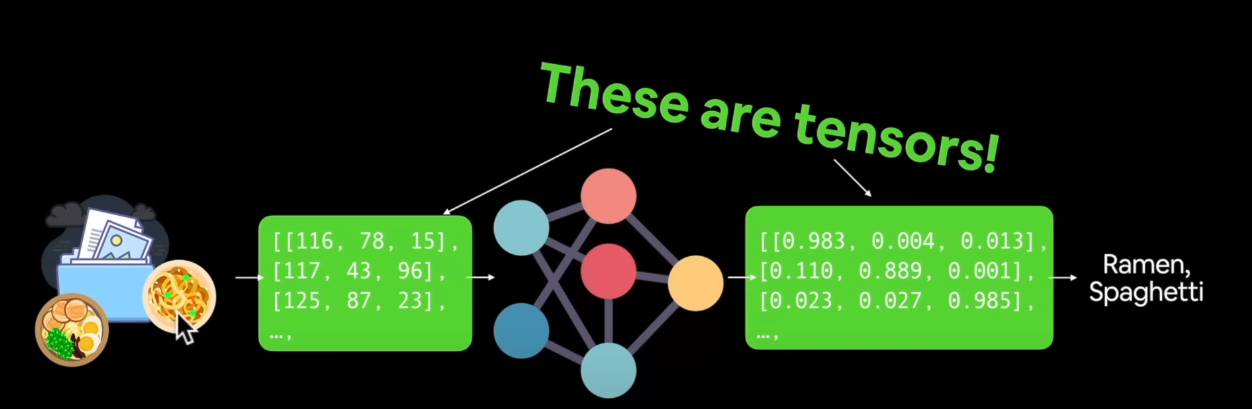

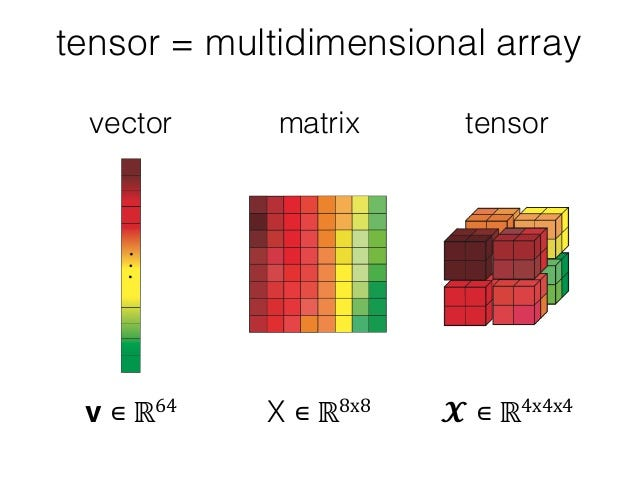

los Tensores Pueden tener la dimension que queramos pero el dibujo de arriba nos muestra uno de 4

Forma de ver nuestra gráfica en collab, cuidado ya que si no estamos en un entorno de GPU no funcionará el comando ya que estaremos usando una cpu, no una GPU

In [ ]:
!nvidia-smi

Tue Oct  3 02:30:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Fundamentos de Pytorch

notebook recurso: https://www.learnpytorch.io/

Si tenemos alguna duda: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.0.1+cu118


##creación de un tensor


In [ ]:
#Scalar

scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
#dimensión de nuestro tensor
scalar.ndim

0

In [ ]:
#obtener el tensor de vuelta a un numero
scalar.item()

7

In [ ]:
#vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

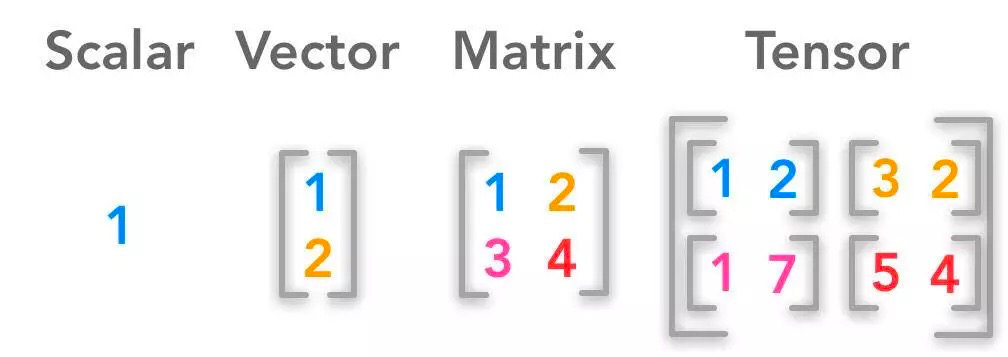

In [ ]:
#dimensión del vector
vector.ndim

1

In [ ]:
#tenemos 1 dimensión que es un vector pero de 2 elementos
vector.shape

torch.Size([2])

In [ ]:
#matriz
matriz = torch.tensor([[7,8],[8,7]])
matriz

tensor([[7, 8],
        [8, 7]])

In [ ]:
#dimensión de la matriz
matriz.ndim

2

In [ ]:
#selecion de secciones
matriz[1]

tensor([8, 7])

In [ ]:
#forma de la matriz, 2 elementos con 2 elementos
matriz.shape

torch.Size([2, 2])

In [ ]:
#tensor
tensor = torch.tensor([[[1,2,3],[3,5,7],[2,9,8]]])
tensor

tensor([[[1, 2, 3],
         [3, 5, 7],
         [2, 9, 8]]])

cada vez que pytorch crea un tensor, esto es lo que hace realmente

In [ ]:
#dimension de un tensor
tensor.ndim

3

In [ ]:
#fomra de los tensores
tensor.shape

torch.Size([1, 3, 3])

nos encontramos con 1 tensor, de 3 listas con 3 elementos

In [ ]:
tensor[0]

tensor([[1, 2, 3],
        [3, 5, 7],
        [2, 9, 8]])

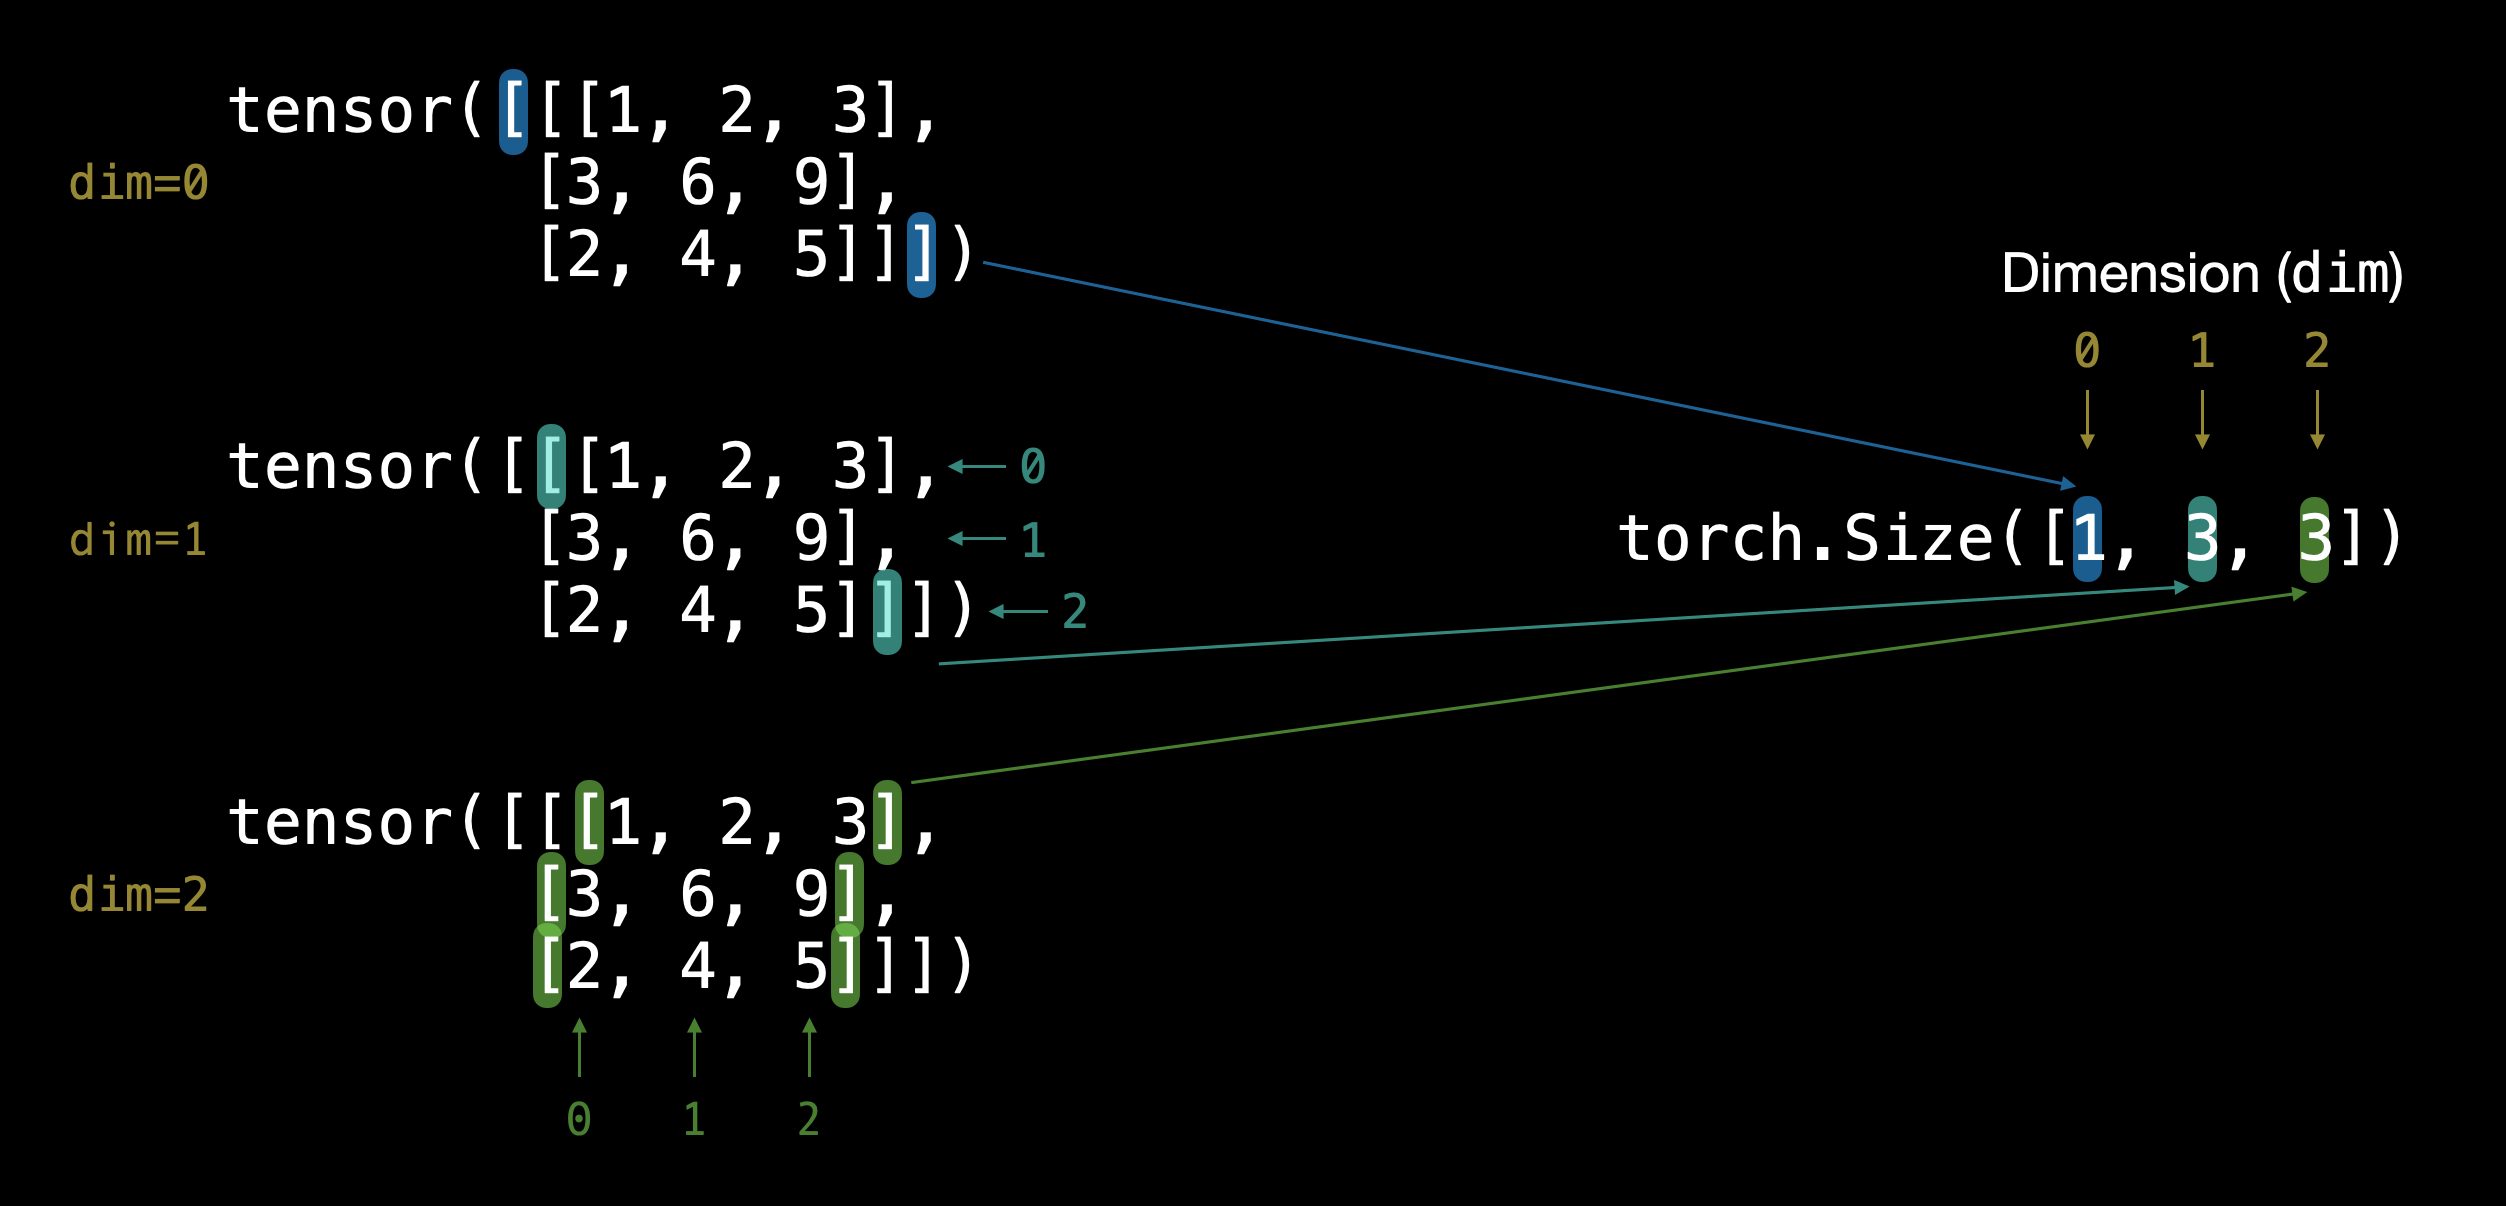

Nomenclatura usada para hacer referencia al tipo de variable en paper y documentación

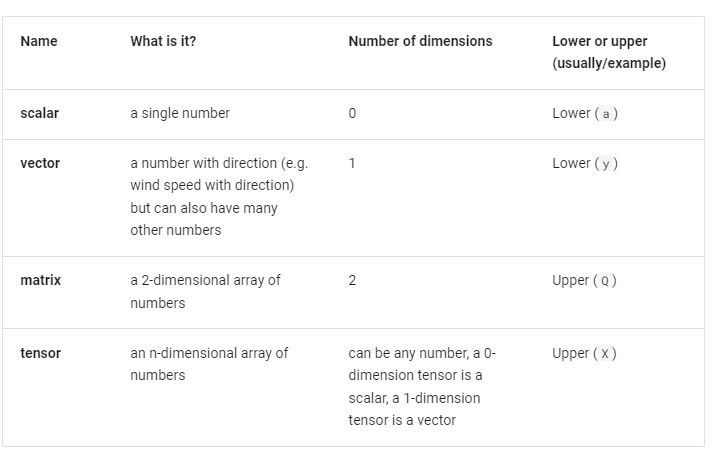

## tensor random

Es un concepto importante ya que las redes neuronales en el proceso de entrenamiento usan tensores random para encontrar una solución

el proceso seria:

empieza con numeros random -> mira los datos -> actualiza los numeros random -> mira los datos

In [ ]:
# crear un tensor random de tamaño (3,4), 3 listas de 4 elementos, dentro de 1 tensor, lo podemos ver con shape

tensor_random = torch.rand(3,4)
tensor_random


tensor([[0.3886, 0.4022, 0.1509, 0.1480],
        [0.6769, 0.0796, 0.2223, 0.2234],
        [0.1191, 0.5146, 0.8121, 0.7607]])

In [ ]:
tensor_random.shape

torch.Size([3, 4])

Imagina que un tensor es como un cubo de Rubik completo. Cada pieza en este cubo representa un tensor de orden 2, o una matriz. En términos de "shape", podrías tener una forma como

3×3 o

4×2, dependiendo de cómo estén organizados los elementos dentro de cada pieza.

Ahora, si pones ese cubo de Rubik dentro de un conjunto de corchetes, como
[
Cubo de Rubik
]
[Cubo de Rubik], has añadido una dimensión. Esto sería equivalente a tener un cubo de Rubik completo. En términos de "shape", ahora tendrías un "1" adicional representando esa dimensión extra.

Si añades otra capa de corchetes,
[
[
Cubo de Rubik
]
]
[[Cubo de Rubik]], estás añadiendo otra dimensión. Ahora tienes una matriz de cubos de Rubik. Cada conjunto de cubos en esta matriz sería un tensor de orden 3.

Si vas un paso más allá y añades otra capa de corchetes,
[
[
[
Cubo de Rubik
]
]
]
[[[Cubo de Rubik]]], ahora tienes un cubo tridimensional compuesto de cubos de Rubik. Esto sería un tensor de orden 4.

En resumen, cada vez que añades una capa de corchetes, estás añadiendo una dimensión al tensor. Y dentro de cada tensor (o pieza del cubo de Rubik en esta analogía), puedes tener elementos dispuestos en una forma específica, como una matriz de
3
×
3
3×3,
4
×
2
4×2, etc.

In [ ]:
tensor_random = torch.rand(2,3,4)
tensor_random

tensor([[[0.2209, 0.7576, 0.2472, 0.5881],
         [0.2704, 0.3497, 0.1872, 0.4559],
         [0.4172, 0.0081, 0.9312, 0.8987]],

        [[0.1296, 0.1204, 0.1762, 0.2059],
         [0.8032, 0.6754, 0.1648, 0.4203],
         [0.0841, 0.3170, 0.4843, 0.5279]]])

In [ ]:
#numero de elementos de nuestro tensor
2*3*4

24

In [ ]:
tensor_random.ndim

3

In [ ]:
#creación de un tensor random con la forma parecida a un tensor de una imagen

In [ ]:
random_image_size_tensor = torch.rand(size=(224,130,3) ) #largo ,alto, canales de color (rojo, gris, azul)
#usar el parametro size no hace nada en especial, por defecto ya lo hace pytorch pero sirve para que se entienda mas el código y ver qué sucede por detras
random_image_size_tensor

tensor([[[0.3231, 0.5285, 0.7477],
         [0.6945, 0.5661, 0.8487],
         [0.4066, 0.6286, 0.6337],
         ...,
         [0.4870, 0.7543, 0.5321],
         [0.5113, 0.6672, 0.2341],
         [0.3134, 0.4731, 0.7197]],

        [[0.8297, 0.7254, 0.4855],
         [0.7618, 0.9826, 0.6739],
         [0.0417, 0.9933, 0.5278],
         ...,
         [0.6004, 0.3069, 0.5132],
         [0.1363, 0.7613, 0.0503],
         [0.6584, 0.9332, 0.2084]],

        [[0.7292, 0.2226, 0.7127],
         [0.3567, 0.3745, 0.1984],
         [0.2983, 0.6413, 0.5414],
         ...,
         [0.6168, 0.6889, 0.1392],
         [0.8190, 0.0674, 0.9578],
         [0.3911, 0.5481, 0.2674]],

        ...,

        [[0.1816, 0.9082, 0.0052],
         [0.6701, 0.2260, 0.5065],
         [0.6517, 0.8774, 0.6655],
         ...,
         [0.0788, 0.1277, 0.3286],
         [0.4761, 0.5869, 0.0224],
         [0.8537, 0.8008, 0.4753]],

        [[0.6740, 0.2328, 0.2283],
         [0.7144, 0.1770, 0.2559],
         [0.

In [ ]:
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 130, 3]), 3)

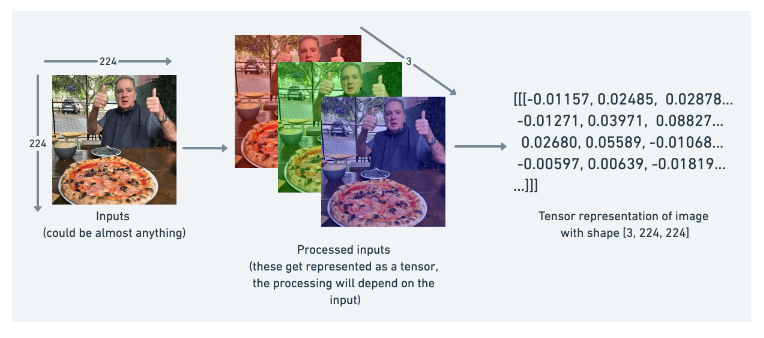

## ceros y unos

In [ ]:
#crear un ttensor de ceros
ceros = torch.zeros (size=(3,4))
ceros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
#crear un tensor de unos
unos = torch.ones(size=(4,5))
unos

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
unos.dtype

torch.float32

tip pro:

el tipo de precisión en este caso de 32 bits hará modelos mas precisos pero tambien mas costosos computacionalmente, si quieres mejorar el costo prueba a recortar la precisión de tus datos, hará el modelo mas ligero de entrenar y usar.

In [ ]:
tensor_random.dtype

torch.float32

## creacion de rango de tensores y copiar tensores en forma

In [ ]:
#hacer rango en tensores
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(4,10)

tensor([4, 5, 6, 7, 8, 9])

In [ ]:
rango = torch.arange(start=0, end=1000, step=20)
rango

tensor([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
        280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540,
        560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820,
        840, 860, 880, 900, 920, 940, 960, 980])

In [ ]:
rango.shape

torch.Size([50])

In [ ]:
#copia de tensores pero su forma no sus valores

grupo = torch.zeros_like(input=rango)
grupo

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

1:53:35

## tipos de datos en tensores

In [ ]:
#float32 tensor

float_32_tensor = torch.tensor([3.0,6.0,9.0], dtype=None)

float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
#float32 tensor

float_16_tensor = torch.tensor([3.0,6.0,9.0], dtype=torch.float16)

float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor.dtype

torch.float16

PARAMETROS:

In [ ]:
#Los parámetros mas importantes a la hora de crear tensores son dtype, device y requieres_grand

float_32_tensor = torch.tensor([3.0,6.0,9.0], dtype=None, device=None, requieres_grand=False )
# dtype is el tipo de tensor que tenemos ()

float_32_tensor

tensor([3., 6., 9.])

requieres_grand=False

se utiliza para indicar si se necesita calcular gradientes para un tensor durante la retropropagación (backpropagation).

requires_grad=True: Cuando se realiza una operación sobre el tensor, PyTorch mantendrá un registro de todas las operaciones en un gráfico computacional. Esto permite que PyTorch calcule automáticamente los gradientes durante la retropropagación, lo cual es esencial para la optimización de modelos de aprendizaje automático.

requires_grad=False: Si se establece este parámetro en False, PyTorch no rastreará las operaciones en el tensor. Como resultado, no se calcularán gradientes para este tensor durante la retropropagación. Esto es útil para tensores que solo contienen datos de entrada o parámetros que no deben ser optimizados.

In [ ]:
float_32_tensor.dtype

torch.float32

###tipos de tensores dtypes:

Este es uno de los puntos mas importantes, ya que nos hace crear modelos que podemos ejecutar o modelos que no podamos, optimización o incluso para reducir significativamente el coste de estos modelos llegando incluso a se un 50% o mas.

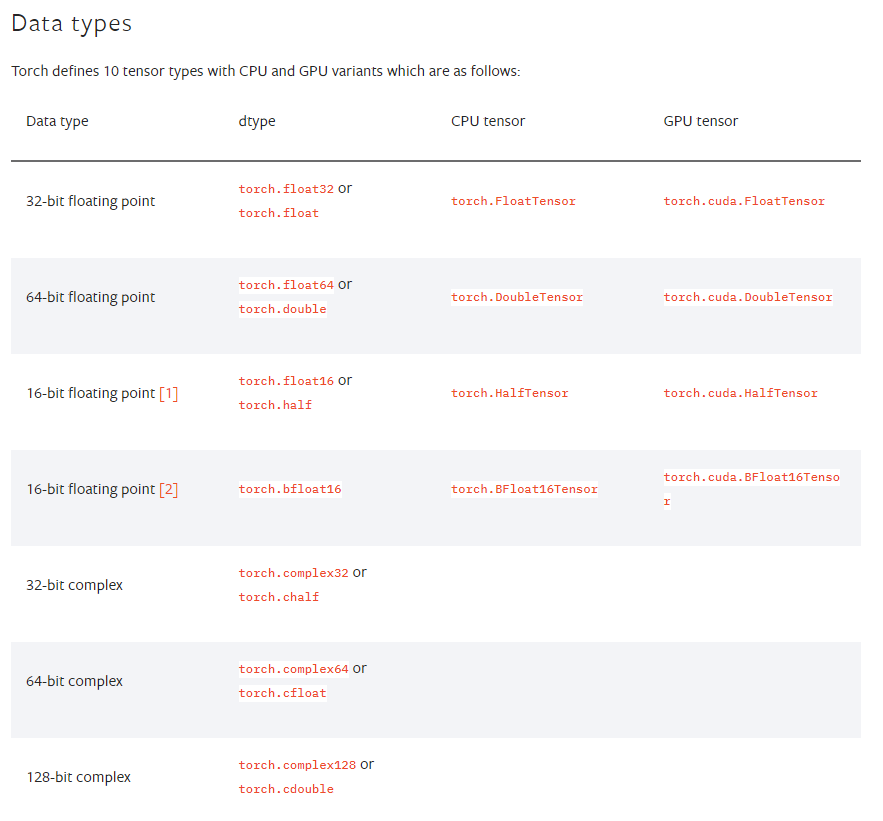

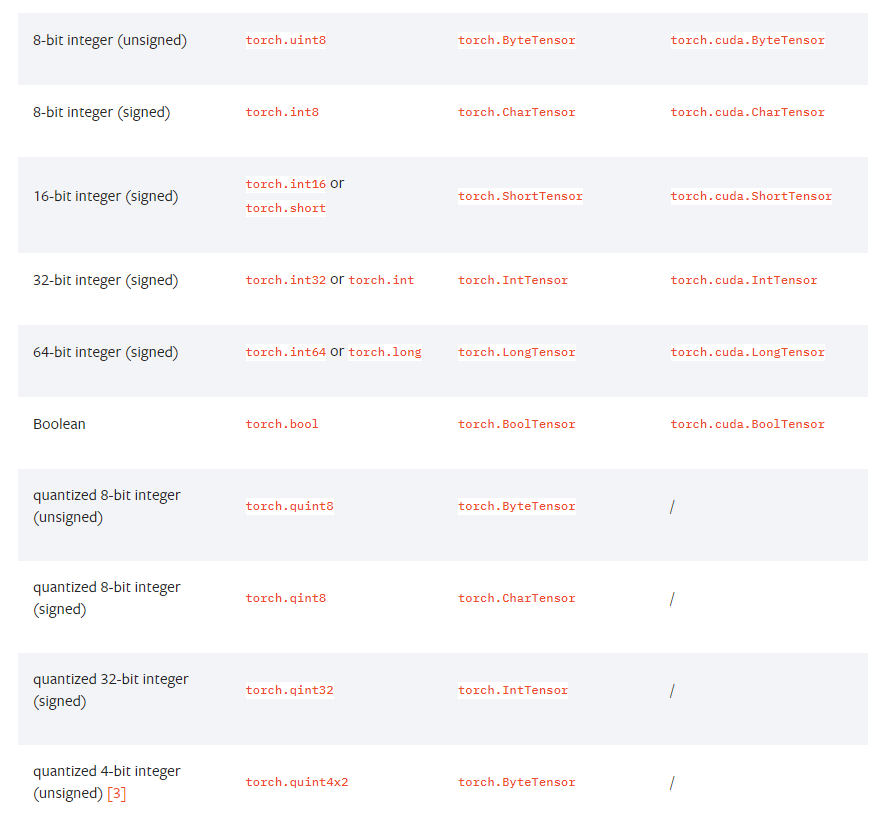

Lo que nos hace seleccionar uno o otro es la precisión en la computacion a mayor precisión, mayor coste de computo, con mas decimales trabajará nuestro modelo para ajustarse

##Nota los grande problemas de pytorch o Errores que se comenten:

1. El tensor no tiene el dtype correcto
2. el tensor no tiene la forma correcta (.shape)
3. El tensor no está en el dispositivo correcto (device como puede ser "cpu", "cuda")

Para el tensor en un dispositivo erroneo:

Si por ejemplo tenemos un tensor en la cpu y otro en un nucleo cuda, están en lugares distintos pytorch nos dará un error al intentar hacer algo con ellos.

## cambio de dtype a un tensor ya creado

In [ ]:
float_64_tensor = float_32_tensor.type(torch.float64)
float_64_tensor

tensor([3., 6., 9.], dtype=torch.float64)

##calculos con tensores

In [ ]:
float_32_tensor*float_16_tensor

tensor([ 9., 36., 81.], dtype=torch.float16)

como podemos ver no aparece ningún error aunque usemos dos tensores con diferente precisión pero vamos a llevarlos un poco mas lejos

In [ ]:
int_32_tensor = torch.tensor([3,6,9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.], dtype=torch.float16)

no hay errores por usar diferentes tipos para operar entre ellos

## Anotaciones

1. El tensor no tiene el dtype correcto [tensor.dtype]
2. el tensor no tiene la forma correcta [tensor.shape]
3. El tensor no está en el dispositivo correcto (device como puede ser "cpu", "cuda") [tensor.device]

In [ ]:
tensor = torch.rand(3,4)
tensor

tensor([[0.9636, 0.6597, 0.6420, 0.9777],
        [0.5420, 0.3626, 0.5348, 0.2204],
        [0.8220, 0.4008, 0.2241, 0.5105]])

In [ ]:
print(tensor)
print(f"datatype del tensor: {tensor.dtype}")
print(f"forma del tensor: {tensor.shape}")
print(f"dispositivo dle tensor: {tensor.device}")

tensor([[0.9636, 0.6597, 0.6420, 0.9777],
        [0.5420, 0.3626, 0.5348, 0.2204],
        [0.8220, 0.4008, 0.2241, 0.5105]])
datatype del tensor: torch.float32
forma del tensor: torch.Size([3, 4])
dispositivo dle tensor: cpu


##manipulación de tensores

vamos a ver como arreglar los problemas de los tensores


Operaciones con tensores:

* Sumar
* Restar
* Multiplicaccion
* division
* Multiplicacion de matrices

In [ ]:
#Sumar
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
#multiplicar un tensor por 10
tensor =tensor *10
tensor

tensor([10, 20, 30])

In [ ]:
#restar 10
tensor = tensor - 10
tensor

tensor([ 0, 10, 20])

In [ ]:
#Funciones incluidas en pytorch
torch.mul(tensor,10)

tensor([  0, 100, 200])

In [ ]:
torch.add(tensor,10)

tensor([10, 20, 30])

multiplicacion de matrices

Hay 2 reglas que tienen que satisfacer los tensores para poder multiplicarse:

1º La dimension interna debe coincidir (como las matrices):

  (3,2) @ (3,2) won´t work

  (2,3) @ (3,2) will work

  (3,2) @ (2,3) will work

  @ es lo mismo que matmul

2º el resultado de la matriz tiene la misma forma que las dimensiones de salida

(2,3) @ (3,2) -> (2,2)

(3,2) @ (2,3) -> (3,3)


In [ ]:
#1º forma nos da el tensor multiplicado pero sin sumar
print(tensor,"*", tensor)
print(f"Equals: {tensor* tensor}")

tensor([ 0, 10, 20]) * tensor([ 0, 10, 20])
Equals: tensor([  0, 100, 400])


In [ ]:
#2º Forma nos da el tensor multiplicado y sumado
torch.matmul(tensor,tensor)

tensor(500)

la diferencia es que el segundo está implementado en pytorch y optimizado por lo que consumirá menos recursos


In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(500)
CPU times: user 3.14 ms, sys: 0 ns, total: 3.14 ms
Wall time: 3.18 ms


tardo 3 milisegundos

In [ ]:
%%time

value += torch.matmul(tensor,tensor)


CPU times: user 122 µs, sys: 0 ns, total: 122 µs
Wall time: 126 µs


tardo 126 microsegundos unas 30x veces menos

## uno de los errores mas comunes en deep learning  "Errores de forma" (shape)

In [ ]:
# forma de multiplicacion de matrices
tensor_A = torch.tensor([[1,2],[2,3],[5,6]])

tensor_B= torch.tensor([[7,2],[9,11],[12,53]])

#torch.matmul(tensor_A, tensor_B)  torch.mm es lo mismo que matmul solo que abreviado

torch.mm(tensor_A,tensor_B)

RuntimeError: ignored

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

nos aparece el problema de la dimensión de la matriz para arreglarlo:

podemos manipular la forma de uno de los tensores hacer una transposición

transopener cambia los ejes o dimensiones de un tensor dado

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7,  2],
         [ 9, 11],
         [12, 53]]),
 torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  9, 12],
         [ 2, 11, 53]]),
 torch.Size([2, 3]))

entonces si ahora hacemos:

In [ ]:
torch.mm(tensor_A,tensor_B.T)

tensor([[ 11,  31, 118],
        [ 20,  51, 183],
        [ 47, 111, 378]])

In [ ]:
torch.mm(tensor_A,tensor_B.T).shape

torch.Size([3, 3])

## Encontrar el minimo, máximo, media y agregacion de tensores

In [ ]:
x = torch.arange(1,100,10)

In [ ]:
#encontrar el minimo
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
#encontrar el máximo
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
#econtrar la media
torch.mean(x)

RuntimeError: ignored

El error que se podroduce aquí es por el datatype del tensor en este caso tenemos:

In [ ]:
x.dtype

torch.int64

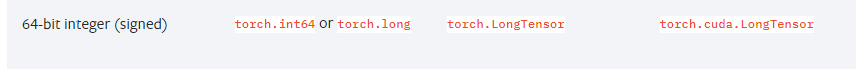

Lo que nos provoca el error de dtype, el propio error ya nos dice qué formatos usar:

Input dtype must be either a floating point or complex dtype. Got: Long

In [ ]:
torch.mean(x.type(torch.float32))

tensor(45.)

tras transformarlo en float32 ahora si podremos usarlo

se puede ver los tipos aquí:https://pytorch.org/docs/stable/tensors.html

In [ ]:
# hacer la suma del tensor

torch.sum(x), x.sum()

(tensor(450), tensor(450))

2:54:00

## Econtrar la posición del minimo y el maximo

In [ ]:
x = torch.arange(1,100,10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
#encontrar la posición en el tensor que tiene el minimo valor con argmin() --> Devuelve el index de la posición objetivo del tensor donde el valor minimo ocurre
x.argmin()

tensor(0)

In [ ]:
#por lo que podemos ver que la posición  0 en la mínima del tensor

x[0]

tensor(1)

In [ ]:
#encuentra la posición del tensor que tiene el valor maximo con argmax()

x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - definir la forma del tensor
* view - Devuelve una vision del tensor de entrada de cierta forma pero mantiene en la misma memoria el tensor original

* Stacking- combina multiples tensores uno encima de otro (vstack) o uno al lado de otro (hstack)

* Squeeze- eliminada todas las dimensiones de un tensor las deja a 1
* unsqueeze - añade una dimension a un tensor
* permute - devuelve una vision del input con las dimensiones permutadas (swapped) de cierta forma

In [ ]:
x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
#añadimos una dimension extra
x_rehecho = x.reshape((1,7))
x_rehecho, x_rehecho.shape

RuntimeError: ignored

Con esto podremos modificar la forma del tensor por ejemplo:

In [ ]:
x_rehecho = x.reshape((1,9))
x_rehecho, x_rehecho.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

le acabamos de añadir una dimensión pero respetando el número de datos es decir 9 datos en 1 dimensión

O podemos probar a 2 dimensiones

In [ ]:
x_rehecho = x.reshape((2,9))
x_rehecho, x_rehecho.shape

RuntimeError: ignored

No podriamos ya que tendriamos 2 cajas con 9 datos cada una para lo cual no tenemos suficientes datos

In [ ]:
x_rehecho = x.reshape((9,1))
x_rehecho, x_rehecho.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

lo que si podemos hacer es 9 cajas con 1 datos cada una

In [ ]:
x_rehecho = x.reshape((3,3))
x_rehecho, x_rehecho.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

o hacer 3 cajas con 9 datos, se puede jugar con su forma para que coincida con la entradas a modelos o entre tensores

##cambiar la vista

In [ ]:
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

cambiar  cambia x (ya que view de un tensor comparte la misma memoria que el input original)

In [ ]:
z[:,0] = 5
x, z

(tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]))

## stack tensores encima uno de otro

In [ ]:
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
x_stacked = torch.stack([x,x,x,x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [ ]:
x_stacked = torch.stack([x,x,x,x], dim=2)
x_stacked

IndexError: ignored

Este error aparece ya que la dimencion del tensor original es incompatible con tener una dimension 2, parecido al caso anterior

##Squeeze y unsqueeze

creamos el tensor dimensión 0

In [ ]:
x_rehecho= torch.arange(1,10)
x_rehecho

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x_rehecho.shape

torch.Size([9])

añadimos una dimensión

In [ ]:
x_rehecho=x_rehecho.reshape(1,9)
x_rehecho

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
x_rehecho.shape

torch.Size([1, 9])

deshacemos esa dimension

In [ ]:
x_rehecho=x_rehecho.squeeze()
x_rehecho,x_rehecho.shape

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

podemos volver a darle su dimensión


In [ ]:
x_rehecho= x_rehecho.unsqueeze(dim=0)

In [ ]:
x_rehecho.shape

torch.Size([1, 1, 1, 1, 1, 9, 1, 1, 1, 1])

La función unsqueeze() en Pytorch se utiliza para agregar una dimensión extra de tamaño 1 a un tensor en la posición especificada. Este es un método comúnmente usado para incrementar la dimensionalidad de un tensor, lo cual puede ser necesario para que el tensor sea compatible con ciertas operaciones o funciones que requieren una dimensión adicional.

En el código proporcionado:

python
Copy code

x_rehecho= x_rehecho.unsqueeze(dim=0)

x_rehecho es un tensor y unsqueeze(dim=0) agrega una dimensión extra en la posición 0 (al principio del tensor). Por ejemplo, si x_rehecho originalmente tiene una forma de (a, b, c), después de aplicar unsqueeze(dim=0), su forma cambiará a (1, a, b, c).

Esta operación es muy útil en redes neuronales y otras operaciones de procesamiento de tensores donde la coincidencia de dimensiones es crucial para la correcta ejecución de las operaciones.

## permuta

In [ ]:
x_original = torch.rand(size=(224,224,3)) # largo, alto, canales rgb
x_original

tensor([[[7.4638e-01, 7.0184e-01, 9.8333e-01],
         [4.1283e-01, 3.0900e-01, 6.6459e-02],
         [3.3724e-02, 9.5256e-01, 9.4749e-01],
         ...,
         [7.0081e-01, 2.9430e-02, 6.0267e-01],
         [5.6669e-02, 6.7303e-01, 3.9204e-01],
         [1.1770e-01, 7.3459e-01, 4.1869e-03]],

        [[3.4723e-01, 8.4375e-01, 9.9538e-02],
         [3.5456e-01, 8.4454e-01, 5.6063e-01],
         [4.8416e-01, 7.2070e-01, 4.6425e-03],
         ...,
         [2.9119e-01, 4.9641e-01, 6.7301e-01],
         [6.7878e-01, 1.9915e-01, 9.3603e-01],
         [1.2516e-01, 1.7960e-01, 9.3835e-01]],

        [[5.2151e-01, 9.0063e-01, 1.1863e-01],
         [1.3443e-02, 6.7390e-01, 3.6201e-01],
         [5.9011e-01, 1.3191e-01, 6.3617e-01],
         ...,
         [7.9478e-01, 5.3925e-02, 2.2241e-01],
         [6.9630e-01, 8.7438e-01, 2.1178e-01],
         [5.0011e-01, 2.8845e-01, 1.7785e-01]],

        ...,

        [[8.7802e-01, 8.5509e-02, 3.5008e-01],
         [3.6839e-01, 6.6059e-01, 9.0265e-01]

In [ ]:
#permutar el tensor original para reordenar el orden de los ejes o dimensiones
x_permuted = x_original.permute(2, 0, 1) #shifts axis 0 ->1, 1->2, 2->0

In [ ]:
x_permuted.shape, x_original.shape

(torch.Size([3, 224, 224]), torch.Size([224, 224, 3]))

3:23

##indexar ( selecionar datos dle tensor)

indexar con pytorch is parecido a hacerlo con numpy

In [ ]:
import torch

In [ ]:
x= torch.arange(1,10).reshape(1,3,3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

vamos a indexar en nuestro tensor

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

vamos a indexar el primero de los corchetes (dim=1)


In [ ]:
x[0][0]

tensor([1, 2, 3])

vamos a indexar en lo mínimo, el primer dato del primer corchete del primer tensor (ultima dimesion)


In [ ]:
x[0][0][0]

tensor(1)

In [ ]:
x[0][2][2]

tensor(9)

se puede usar ":" para seleccionar todos los datos de la dimension

In [ ]:
x[:,0]

tensor([[1, 2, 3]])

obtener todos los valores de 0 y 1 dimesion pero solo indexar el 1º y 2º dimension

In [ ]:
x[:,:,1]

tensor([[2, 5, 8]])

##pytorch tensores y numpy

pytorch tiene la funcionalidad de interactuar con numpy

* pasar de datos en numpy a tensores en pytorch -> torch.from_numpy(ndarray)
* pasar tensores a array de numpy -> torch.Tensor.numpy()

In [ ]:
#numpy array a tensor
import torch
import numpy as np

array= np.arange(1.0,10.0)
tensor = torch.from_numpy(array)
array,tensor,tensor.dtype

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64),
 torch.float64)

In [ ]:
#Cuidado ya que numpy tiene por formato base float64
#mientras que pytorch lo tiene en 32

In [ ]:
array.dtype

dtype('float64')

In [ ]:
torch.arange(1.0,10.0).dtype

torch.float32

este caso solo sucede cuando nuestros datos llevan coma

In [ ]:
array= np.arange(1,10)
array.dtype

dtype('int64')

In [ ]:
torch.arange(1,10).dtype

torch.int64

en este caso usan el mismo formato

In [ ]:
#cambio de formato
tensor = torch.from_numpy(array).type(torch.float32)

pasar el tensor a numpy

In [ ]:
#tensor a numpy
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy_tensor.dtype

dtype('float32')

In [ ]:
#cambiar el tensor, qué sucede a numpy_tensor
tensor = tensor +1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

se mantiene el principio de memoria, ya que no la hemos actualizado

##reproducibilidad (tratando de eliminar el azar del azar)

en resumen como las redes neuronales aprenden:

empezamos con numeros randoms -> operaciones en el tensor -> actualizamos los numeros randoms para intentar y hacer parecidos a los datos -> y así una y otra vez

In [ ]:
torch.rand(3,3)

tensor([[0.7165, 0.7264, 0.8554],
        [0.6445, 0.4992, 0.1036],
        [0.7783, 0.8629, 0.0124]])

para reducir la aletoriedad en las redes neuronales en pytorch usamos el concepto de semilla random



In [ ]:
import torch
#creando dos tensores random
random_tensor_A= torch.rand(3,4)
random_tensor_B=torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.1462, 0.5835, 0.6280, 0.7478],
        [0.8825, 0.2516, 0.1810, 0.4562],
        [0.9058, 0.7539, 0.1363, 0.4387]])
tensor([[0.5222, 0.5559, 0.1815, 0.4118],
        [0.4967, 0.2891, 0.1721, 0.9177],
        [0.0697, 0.0049, 0.3890, 0.4076]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# vamos a hacer algunos tensores random reproducibles
import torch
#seleccionar la semilla random
Random_seed = 42
torch.manual_seed(Random_seed)

random_tensor_c= torch.rand(3,4)
torch.manual_seed(Random_seed)
random_tensor_d = torch.rand(3,4)

print(random_tensor_c)
print(random_tensor_d)
print(random_tensor_c == random_tensor_d)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


cada vez que declaramos un tensor tenemos que definir qué semilla queremos usar

## correr tensores y objetos de pytorch en gpus (y hacer mas rápida la computacion)

página para aprender a elegir una gráfica o servicio en la nubehttps://timdettmers.com/category/deep-learning/

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#comprobar el acceso al gpu en pytorch

import torch
torch.cuda.is_available()

False

In [ ]:
#instalar el dispositivo de código agnostic y establecer la variable device

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#contar el numero de dispositivos

torch.cuda.device_count()

0

buenas practicas para pytorch y cuda:
https://pytorch.org/docs/stable/notes/cuda.html

In [ ]:
# poner tensores y modelos en las GPU (son mas rápidas que las cpus)

In [ ]:
#crear un tensor por defecto lo hará en la cpu
tensor = torch.tensor([1,2,3], device="cpu")

#comrpobamos
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
#movernos a una gpu si está disponible
tensor_en_gpu = tensor.to(device)
tensor_en_gpu

tensor([1, 2, 3])

In [ ]:
# mover tensores de vuelta a la cpu

In [ ]:
# si el tensor está en la gpu, no podemos transformarlo en numpy
tensor_en_gpu.numpy()

array([1, 2, 3])

In [ ]:
#para arreglarlo tenemos que movernos a la cpu
tensor_de_vuelta_a_cpu = tensor_en_gpu.cpu().numpy()
tensor_de_vuelta_a_cpu

array([1, 2, 3])

#APLICACIÓN A LA REALIDAD Y USO

In [ ]:
https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises

##pytorch workflow

vamos a ver un ejemplo de trabajo con pytorch

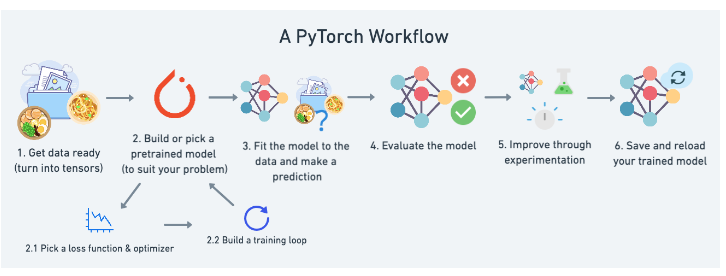

In [ ]:
Que_cubriremos= {1:"data (prepararla y cargarla)",
                 2: "construir el modelo",
                 3: "entrenar el modelo con los datos (entrenamiento)",
                 4: "hacer predicciones y evaluar el modelo (inferencia)",
                 5: "guardar y cargar modelos",
                 6: "ponerlo todo junto"}

Que_cubriremos

{1: 'data (prepararla y cargarla)',
 2: 'construir el modelo',
 3: 'entrenar el modelo con los datos (entrenamiento)',
 4: 'hacer predicciones y evaluar el modelo (inferencia)',
 5: 'guardar y cargar modelos',
 6: 'ponerlo todo junto'}

In [ ]:
import torch
from torch import nn #nn contiene todos los bloques de construccion de pytorch para redes neuronales

https://pytorch.org/docs/stable/nn.html

Es el trabajo del data scientist saber combinar las diferentes capas de las redes neuronales para obtener el resultado que queremos predecir

In [ ]:
import matplotlib.pyplot as plt

#comprobar la version de pytorch
torch.__version__

'2.0.1+cu118'

## (Datos) preparación y carga

A los modelos podemos pasarle:

* hojas de excel
* imagenes
* videos
* audios
* ADN
* texto

Podemos resumir nuestro trabajo en 2 partes:

1. Conseguir convertir los datos a numeros
2. Construir un modelo para aprender patrones en esos numeros

##regresion lineal

In [ ]:
# creamos los parametros desconocidos
#el peso (weight) es el parametro B de una regresión lineal
#el bias es el parámetroa a de un regresión lineal

# y=α+βx (formula regresion lineal)
peso = 0.7
bias = 0.3

# creacion de datos
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)#unsqueeze añade 1 dimensión extra ya que si no tendriamos 0 dimensiones (mas tarde se explicará el motivo de esto)
y = peso * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
len(X), len(y)

(50, 50)

En este caso conocemos la formula de salida (y), pero este es el caso ideal, sim embargo esta es la clave en machine learning que no la sabremos por lo que tendremos que inferirla

##División de los datos en entranamiento y tets (super importante)

In [ ]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

se puede automatizar

##visualización de los datos

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
import matplotlib.pyplot as plt
def plot_predicciones(train_data= X_train,
                      train_labels=y_train,
                      test_data= X_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(10,7))

  #dibujar los datos de entrenamiento en azul
  plt.scatter(train_data,train_labels, c="b", s=4, label= "training data")

  #dibujar el test data en verde
  plt.scatter(test_data,test_labels, c="g", s=4, label= "testing data")

  #Hay predicciones?
  if predictions is not None:
    #dibujar las predicciones si existen
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  #leyenda del grafico
  plt.legend(prop={"size":14})

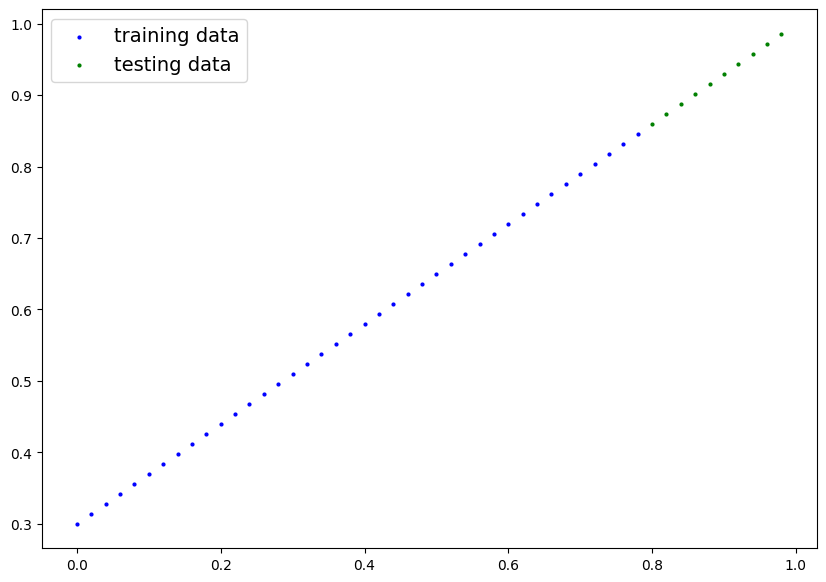

In [ ]:
plot_predicciones()

tenemos los datos en azul y al final nuestros datos para probar el modelo en verde

##construción del modelos

pequeño recursos para entender las clases y la programacion orientada a objetos (oop): https://realpython.com/python3-object-oriented-programming/

###modelo de regresion lineal

como el modelo hace la prediccion:
* Empieza con valores aleatorios (pesos y bias)
* Mira los datos de entrenamiento y ajusta los valores aleatorios para mejorar la representaión o quedarse cerca de los valores ideales (peso y bias que usamos para crear los datos)

Cómo lo hace?

mediante dos algoritmos:

1. Descenso del gradiente (Gradient descent) https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown
2. la propagación hacia atras (Backpropragation)https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown

In [ ]:
from torch import nn

class LinearRegresionModel(nn.Module):  # <- casi todo en PyTorch hereda de nn.Module (probablemente el método más importante para aprender en PyTorch)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,  # por defecto ya está en True, no hace falta ponerlo; y este es nuestra activación del descenso del gradiente para los pesos
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,  # y este es nuestra activación del descenso del gradiente para el bias
                                             dtype=torch.float))

    # método de búsqueda para definir la computación del modelo (básicamente, en nuestra función para hacer que funcione el modelo, el iniciador; lo de arriba es la arquitectura)
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" son los datos de entrada
        return self.weights * x + self.bias  # esta es la fórmula de la regresión lineal


### modelos de pytorch esenciales

* torch.nn contiene todos los bloques para la computacione de grafos (las redes neuronales son grafos)

* torch.nn.Parameter - Son los parametros que deberia tener nuestro modelo para entrenar y aprenders, amenudo pytorch layer desde torch.nn lo definirá por nosotros.
* torch.nn.Module la clase base para todos los modulso de redes neuronales, si lo haces con subclases, deberias sobreescribir el forward()

* torch.optim aquí es con lo que optimizamos en pytorch, se realizará con el descenso del gradiente

* def forward() - todas los nn.Modules subclases rrequiere que sobrescribas forward(), este método define que sucede en la computación predicha

revisando los contenidos de nuestro modelo de pytorch

- Despues de crear el modelo vamos a ver qué hay dentro

así que vamos a comrpobar nuestros parametros del modelos o que hay dentro del modelo al usar .parameter().

In [ ]:
import torch
#crearemos una semilla aleatoria
torch.manual_seed(42)

# creamos una instancial del modelo (esta es una subclase de nn.Module)

model_0 = LinearRegresionModel()

#comprobar los parametros
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#así quitamos que genere tensores aleatorios
torch.manual_seed(32)
torch.randn(1)

tensor([0.8651])

In [ ]:
#lista de nombres de parametros de nuestro modelo
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

El objetivo es cambiar nuestros tensores para llegar a:

In [ ]:
peso, bias

(0.7, 0.3)

###hacer predricciones usando torch.inference_mode()

Para comprobar nuestro poder de prediccion del modelo, vamos a ver como predice y_test basado en X_test

cuando pasamos datos a través de nuestro modelo, va a ejecutar el forward() method

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
#hacer la prediccion
with torch.inference_mode():# lo que hace este modo es apagar el trackeo del gradiente, ya que cuando hacemos inferencia y no estamos entrenando a l modelo necesitamos que los gradientes se mantengan
  #además lo hace mas eficiente ya que no tendrá que estar haciendo el seguimiento del gradiente en la inferencia
  y_preds = model_0(X_test)

#tambein se puede usar _grad, pero  inference_mode() es mjeor
#with torch.no_grad():
 # y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

Mas info del inference_mode

https://pytorch.org/docs/stable/generated/torch.inference_mode.html

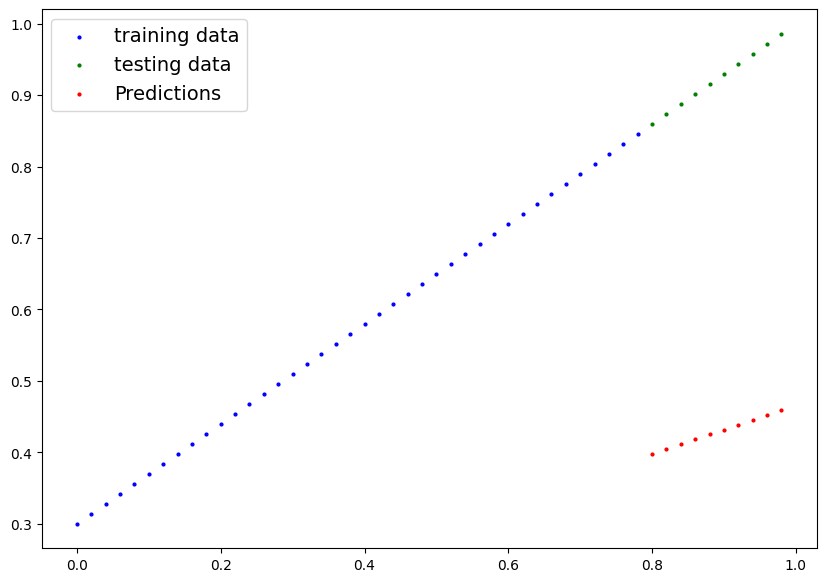

In [ ]:
plot_predicciones(predictions=y_preds)

la idea del entrenamiento es para un modelo mover los parametros desconocidos (que serán aleatorios), a parametros conocidos.

En otras palabras, desde una representación mala de los datos a una buena. (visualización arriba)

la forma de hacerlos es usando la función de perdida.
mas info: https://pytorch.org/docs/stable/nn.html#loss-functions

* Nota: la función de perdida tambien se le llama función de coste o criterio en diferentes areas

Lo que vamos a entrenar:

* Loss function:
Es una función que mide como de equivocado está tu modelo en las predicciones respecto a los datos ideales

* Optimizador:  toma en cuenta la perdida del modelo y ajusta los parametros (pesos y bias)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#comprobacion de nuestros parametros (un parametro is un valor que el modelo elige por si mismo)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

info sobre la funcion de perdida muy interesante L1 y L2 esplicados: https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# entrenamiento del modelo

#configurar función de perdida:
loss_fn = nn.L1Loss()   #L1 es el error cuadratico medio- la ditancia entre la prediccion y el dato real tambien conocido como el MAE (error absoluto medio se calcula como (dato de la predicción - dato real))

#configurar el optimizador: info -> https://pytorch.org/docs/stable/optim.html#module-torch.optim

optimizador = torch.optim.SGD(params=model_0.parameters(),#descenso del gradiente estocastico
                              lr=0.02) #lr = learning rate -> posiblemente el mas importante hyperparametro que ponermos elegir (se elige por experiencia no hay una regla)
                              #lo que hace es hacer una alteracion en nuestro tensar de peso en este caso una variación de 0,02 (un lr bajo hace pequeños cambios y un lr alto hace grandes cambios en nuestros parametros)

Qué funcion de perdida y optimizados debemos usar?

Este es un problema específico pero con la experiencia, tendremos una idea de que funciona y que no funciona con nuestros problemas.

Por ejemplos, para un problema de regresión (como este), un funcion de perdida nn.L1Loss() y un optimizados como torch.optim.SGD() es suficiente.

Pero para un problema de clasificación como puede ser clasificar una imagen entre perros o gatos, querremos usar una función de perdidda como nn.BCELoss() (perdida binaria de entropia cruzada)

###construyendo el loop de entrenamiento

cosas que necesitamos en el loop:
- loop de los datos
- forward pass (llamada a nuestro modelo forwards para hacer que pasen los datos por el modelo)
- calcular la perdida (para comparar las predicciones del forward con los dato reales)

- optimizar el zero grad
- perdida hacia atrás - cambia los parametros en funcion de la perdida (**backpropagation**)
- optimizacion por paso - usa el optimizador para ajustar nuestro modelo y mejorar la perdida (**descenso del gradiente**)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#una epoca is un loop a través de los datos cuantas veces como épocas tengamos
epochs = 100

#trackeo del progreso / con el que podremos compararlos con otras configuraciones o medelos
epoch_count = []
loss_values = []
test_loss_values = []

##Entrenamiento
# 0. loop de datos
for epoch in range(epochs):
  #poner el modelo en el modo entrenamiento
  model_0.train()# train mode pone todos los parametros que requieren gradiente en requerir gradiente
  # 1. forward pass (paso hacia delante)
  y_pred = model_0(X_train)

  #2. clacular la perdida
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  #3. optimizar el grado cero
  optimizador.zero_grad()

  #4. realizar backpropagation de la perdida con respecto a los parametros del modelo
  loss.backward() #por defecto la forma en el que el optimizador cambia es acumulando en el loop.

  #5. paso de optimizacion (mejorando el descenso del grandiente)
  optimizador.step()

# testeo

  model_0.eval()#(apaga algunos ajustes ya que no los necesitados para probar si funciona) (dropout / normalizacion de las capas)

  with torch.inference_mode(): #apaga el traqueo de gradientes y un par de cosas mas, (Ejemplos y explicación: https://x.com/PyTorch/status/1437838231505096708?s=20)

  # with torch.no_grad(): se puede ver en código de pytorch antiguo, inference_mode es mas optimo

    #1. Hacer el paso haciea delante
    test_pred= model_0(X_test)

    # 2. calcular la perdida
    test_loss = loss_fn(test_pred, y_test)

  #mostrar lo que etsá sucediendo

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoca: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())


loss: 0.31288138031959534
Epoca: 0 | Loss: 0.31288138031959534 | Test loss: 0.4675941467285156
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss: 0.28983935713768005
loss: 0.26679736375808716
loss: 0.24375534057617188
loss: 0.22071333229541779
loss: 0.1976713389158249
loss: 0.1746293604373932
loss: 0.1515873372554779
loss: 0.12854532897472382
loss: 0.10609114170074463
loss: 0.08831816911697388
Epoca: 10 | Loss: 0.08831816911697388 | Test loss: 0.20536987483501434
OrderedDict([('weights', tensor([0.4223])), ('bias', tensor([0.3418]))])
loss: 0.07545244693756104
loss: 0.06641419231891632
loss: 0.05990664288401604
loss: 0.055704690515995026
loss: 0.05250788480043411
loss: 0.050354838371276855
loss: 0.048709869384765625
loss: 0.047426268458366394
loss: 0.04641704633831978
loss: 0.04547790437936783
Epoca: 20 | Loss: 0.04547790437936783 | Test loss: 0.11100725829601288
OrderedDict([('weights', tensor([0.4766])), ('bias', tensor([0.3878]))])
loss: 0.044677894562482

In [ ]:
#Nuestro objetivo:
peso, bias

(0.7, 0.3)

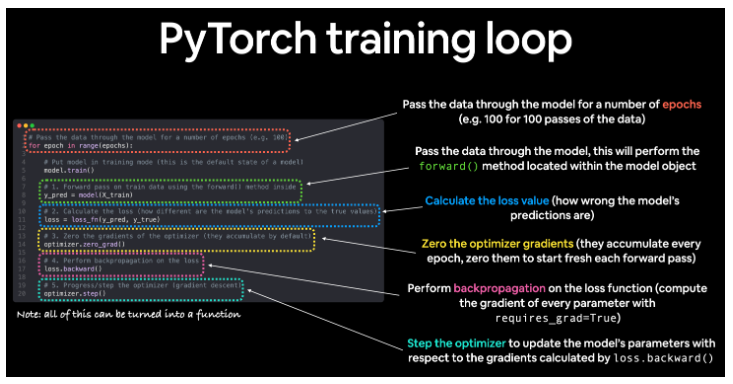

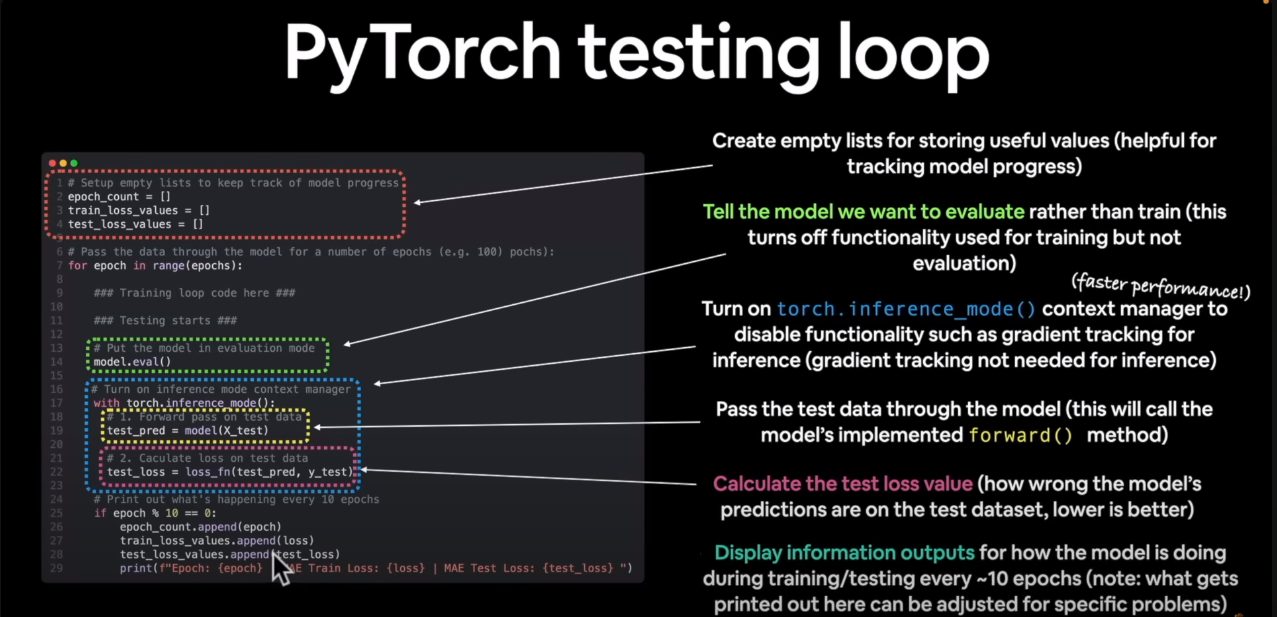

### grafico de perdidas

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.08831817, 0.0454779 , 0.03829659, 0.03142779,
       0.02456694, 0.01768933, 0.01082388, 0.00396577, 0.01409052],
      dtype=float32)

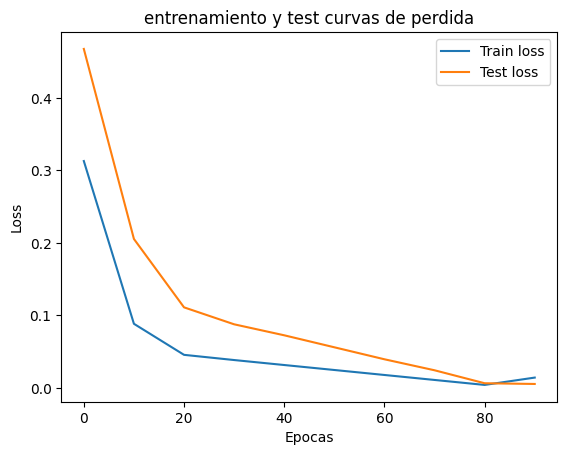

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss") #super importante esta parte
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("entrenamiento y test curvas de perdida")
plt.ylabel("Loss")
plt.xlabel("Epocas")
plt.legend()

###Representación de las predicciones

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

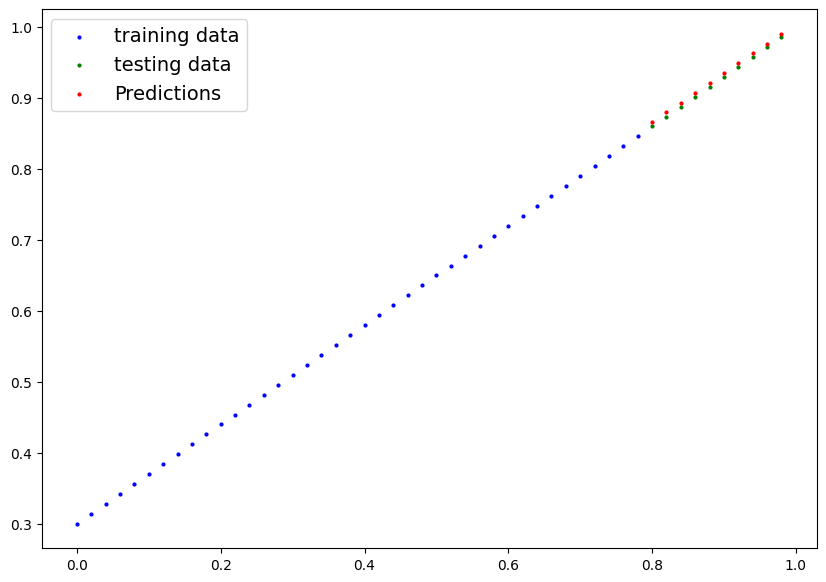

In [ ]:
plot_predicciones(predictions=y_pred_new)

###Guardar y Carga de modelos

 -Guardar modelos en pytorch-

* existen 3 métodos para guardar y cargar modelos en pytroch:

1. torch.save() - guardar el objeto de pytorch en un formato de pickle  

2. torch.load - te permite cargar un objeto de pytorch guardado

3. torch.nn.Module.load_state_dict() - permite cargar un modelo guardado con todos los estados de parámetros de tu modelo

mas info: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# guardar modelos de pytorch
from pathlib import Path

#1. crear un directorio para los modelos
Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

#2. crear una dirección para guardar los modelos
Model_name = "modelo_de_pytorch.pth"
Model_save_path = Model_path / Model_name

#3. guardar el modelo
print(f"guardando el modelo en: {Model_save_path}")
torch.save(obj=model_0.state_dict(),
           f=Model_save_path)

guardando el modelo en: models/modelo_de_pytorch.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6849])), ('bias', tensor([0.2918]))])

In [ ]:
#cargar un modelo de pytorch

#para cargar un modelo con state_dict tenemos que instanciar nuestro modelo (estmos cargando la arquitectura o el laberinto sin tener la solución)

modelo_0_cargado = LinearRegresionModel()

#aquí cargamos los pesos o la solución a nuestro laberinto (arquitectura) que hemos entrenado previamente
modelo_0_cargado.load_state_dict(torch.load(f=Model_save_path))

<All keys matched successfully>

In [ ]:
modelo_0_cargado.state_dict()

OrderedDict([('weights', tensor([0.6849])), ('bias', tensor([0.2918]))])

In [ ]:
# hacer algunas prediciones
modelo_0_cargado.eval()
with torch.inference_mode():
  modelo_0_preds = modelo_0_cargado(X_test)

modelo_0_preds

tensor([[0.8397],
        [0.8534],
        [0.8671],
        [0.8808],
        [0.8945],
        [0.9082],
        [0.9219],
        [0.9356],
        [0.9493],
        [0.9630]])

In [ ]:
# hacer algunas prediciones
modelo_0_cargado.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8397],
        [0.8534],
        [0.8671],
        [0.8808],
        [0.8945],
        [0.9082],
        [0.9219],
        [0.9356],
        [0.9493],
        [0.9630]])

In [ ]:
#comparacion del modelo cargado y original
y_preds == modelo_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#6. PONIENDO TODO JUNTO

Un pequeño resumen todo lo que hemos visto

In [ ]:
# import pytorch y matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#revisar la versión de pytorch

torch.__version__


'2.1.0+cu118'

crear codigo de dispositivo_agnostico

Básicamente que si tenemos acceso a una gpu, el código la usará (son mas rápidas con los calculos de tensores).

si no está disponible, se usará la CPU.

In [ ]:
#instalar el codigo agnostico de dispositivos
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import matplotlib.pyplot as plt
def plot_predicciones(train_data= X_train,
                      train_labels=y_train,
                      test_data= X_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(10,7))

  #dibujar los datos de entrenamiento en azul
  plt.scatter(train_data,train_labels, c="b", s=4, label= "training data")

  #dibujar el test data en verde
  plt.scatter(test_data,test_labels, c="g", s=4, label= "testing data")

  #Hay predicciones?
  if predictions is not None:
    #dibujar las predicciones si existen
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  #leyenda del grafico
  plt.legend(prop={"size":14})

##6.2 DATA

In [ ]:
#creamos algunos datos usando la regresion lineal y = weight * X + bias

weight = 0.7
bias = 0.2

#rango de valores
start = 0
end = 1
step = 0.02

#creamos X e y (categorias y etiquetas)

X = torch.arange(start,end,step).unsqueeze(dim=1) # si usar unsqueeze, tendremos un error de dimension
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2140],
         [0.2280],
         [0.2420],
         [0.2560],
         [0.2700],
         [0.2840],
         [0.2980],
         [0.3120],
         [0.3260]]))

In [ ]:
#dividir los datos
train_split=int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

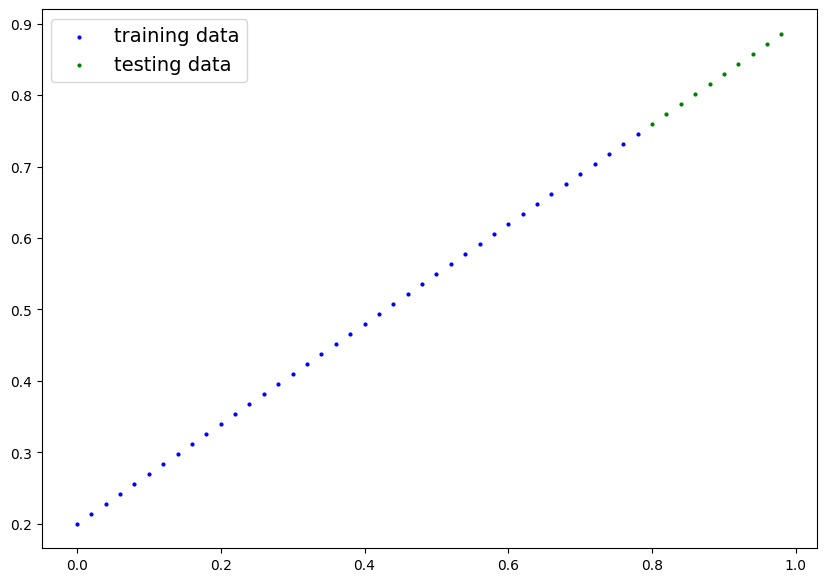

In [ ]:
#dibujamos los datos
# nota: si no tenemos la función plot_predictions() cargada, nos dará error:
plot_predicciones((X_train), (y_train), (X_test), (y_test) )

##6.2 Construimos un modelo lineal en pytorch

In [ ]:
#creamos un modelo lineal usando la clase nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
     super().__init__()
     #usamos nn.Linear() para crear los parametros del modelo
     self.linear_layer = nn.Linear(in_features=1,#inputs    estos parámetros dependeran de nuestros datos ya que si tenemos 1 dato de 1 para una salida de y será 1 a 1. Pero si tenemos 3 datos de X para 2 salidas de y, tenemos 3 a 2.
                                   out_features=1)#outputs

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#ponemos la semilla manual
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

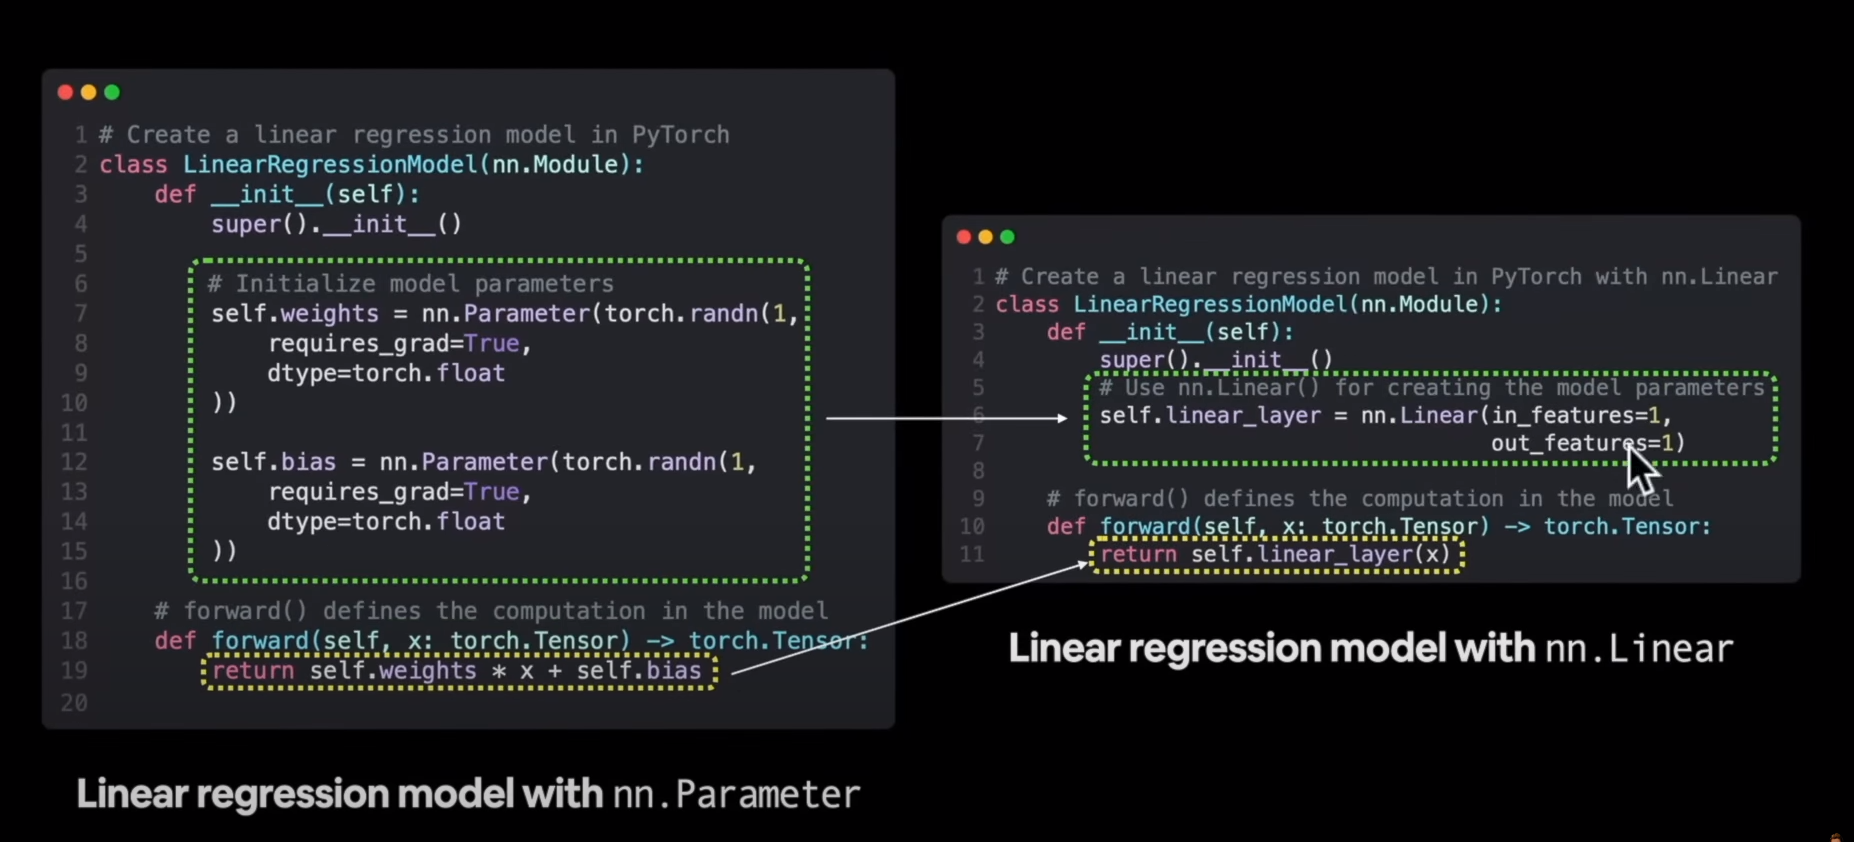

In [ ]:
#comprobamos dónde está el modelo ahora mismo
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#configuramos el dispositivo
device="cuda"
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###6.3 Entrenamiento

Necesitaremos:
* Funcion de perdida
* Optimizador
* Loop de entrenamiento
* Loop de testeo

In [ ]:
#configuramos la funcion de perdida
loss_fn = nn.L1Loss()# lo mismo como el MAe

#configuramos nuestro optimizador
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.04, )

In [ ]:
#Loop de entrenamiento

torch.manual_seed(42)

epochs = 300

#ponemos los datos en la gpu

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)



for epoch in range(epochs):
  model_1.train()

  #1. paso hacia delante
  y_pred = model_1(X_train)

  #2. Calculamos la perdida

  loss = loss_fn(y_pred, y_train)

  #3. Optimizador de zero grado
  optimizer.zero_grad()

  #4. mejorandola la propagración hacia atrás
  loss.backward()

  #5. Optimizador por pasos
  optimizer.step()

  ### Testeo
  model_1.eval()
  with torch.inference_mode():  # Reemplaza torch.inference_mode() con torch.no_grad()
    test_pred = model_1(X_test)  # Utiliza X_test en lugar de X_train

    test_loss = loss_fn(test_pred, y_test)

  # Ver qué sucede
  if epoch % 10 == 0:
    print(f"Epoca: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoca: 0 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 10 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 20 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 30 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 40 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 50 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 60 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 70 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 80 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 90 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 100 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 110 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 120 | Loss: 0.026232082396745682 | Test loss: 0.013241303153336048
Epoca: 130 | Loss: 0.026232082396745682 | Test lo

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6712]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1850], device='cuda:0'))])

In [ ]:
weight,bias

(0.7, 0.2)

###6.4 haciendo y evaluando las predicciones

In [ ]:
#poner el modelo en modo evluacion
model_1.eval()

#hacer predicciones de los datos
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.7220],
        [0.7354],
        [0.7488],
        [0.7622],
        [0.7756],
        [0.7891],
        [0.8025],
        [0.8159],
        [0.8293],
        [0.8428]], device='cuda:0')

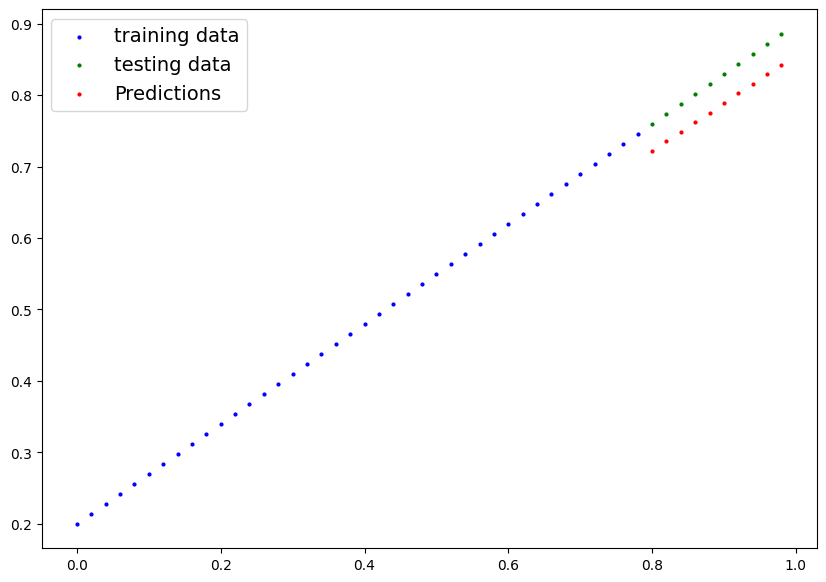

In [ ]:
# Ahora puedes usar y_preds_np en tu función plot_predicciones
plot_predicciones(predictions = y_preds.cpu())


###6.5 guardar y cargar modelo entrenado

In [ ]:
from pathlib import Path

# 1. Crear un directorio para el modelo
Model_Path = Path("models")
Model_Path.mkdir(parents = True, exist_ok = True)

#2. Crear una dirención donde guardar el modelo
Model_name = "01_pytorch_tarabajo_modelo_1.pth"#podemos usar pt o pth
Model_save_path = Model_Path / Model_name

#3. Guardar el modelo con state dict
print(f"guardando el modelo en: {Model_save_path}")
torch.save(obj=model_1.state_dict(),# con esto guardamos nuestros parametros entrenados
           f = Model_save_path)

guardando el modelo en: models/01_pytorch_tarabajo_modelo_1.pth


In [ ]:
#estos son nuestros parametros aunque en la realdiad tendremos millones de ellos no solo 2
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6712]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1850], device='cuda:0'))])

In [ ]:
#cargar un modelo de pytorch

#creamos una nueva instancia del modelo de regresión lineal versión 2 que hicimos
loaded_model_1= LinearRegressionModelV2()

#cargar el modelo guardado con los parametros state_dict()

loaded_model_1.load_state_dict(torch.load(Model_save_path))

#ponemos el modelo cargado en nuestro dispositivo
loaded_model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#podemos ver cómo coincide con nuestros parametros del modelo entrenado
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6712]])),
             ('linear_layer.bias', tensor([0.1850]))])

In [ ]:
#evaluar el modelo cargado
device="cuda"
loaded_model_1.to(device)

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

#teoria matemática sobre redes


1. Descenso del gradiente (Gradient descent) https://www.youtube.com/watch?v=IHZwWFHWa-w&ab_channel=3Blue1Brown
2. la propagación hacia atras (Backpropragation)https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown

In [ ]:
8:17:00